In [697]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats
import re
import os
import math
#import Orange
import copy
import itertools

def getBenchmarkSet(name):
    m = re.match("([a-zA-z]+)",name)
    if m is not None:
        return m.group(0)
    return ""


solvernames = {
    "MOEAD": "MOEA/D",
    "MOLE": "MOLE",
    "omnioptimizer": "Omni-Optimizer",
    "higamo": "HIGA-MO",
    "NSGA-II": "NSGA-II",
    "SMS-EMOA": "SMS-EMOA",
    "MOGSA": "MOGSA",
}

tol_bright = ["#4477AA","#EE6677","#228833","#CCBB44","#66CCEE","#AA3377","#BBBBBB"]

stylemap = {
    "MOLE": {
        "color": tol_bright[0],
        "linestyle": "solid",
        "marker": "s",
        "label": "MOLE"},
    "omnioptimizer": {
        "color": tol_bright[1],
        "linestyle": "dashed",
        "marker": "^",
        "label": "Omni-Optimizer"},
    "NSGA-II": {
        "color": tol_bright[2],
        "linestyle": "dashdot",
        "marker": "o",
        "label": "NSGA-II"},
    "SMS-EMOA": {
        "color": tol_bright[3],
        "linestyle": "dotted",
        "marker": "v",
        "label": "SMS-EMOA"},
}

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#matplotlib.use("pgf")
matplotlib.rcParams.update({
    #"pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    #'text.usetex': True,
    #'pgf.rcfonts': False,
})

# RESULTS FROM VALIDATATION OVER MULTIPLE RUNS

In [698]:
df = pd.read_csv(f"../05lofconfiguration/results.csv")
# df = pd.read_csv(f"./results.csv")

df["benchmark"] = df["instance"].apply(getBenchmarkSet)
df = df.drop(columns="Unnamed: 0")
df["config"] = df["solver"].apply(lambda x: "config-"+x.split("_")[-1])
df["solver"] = df["solver"].apply(lambda x: "_".join(x.split("_")[:-1]))
df["solver"] = df["solver"].apply(lambda x: solvernames[x])
df.loc[df["configuration"].isna(),"config"] = "default"

config_order = ["default", "config-HVN", "config-SP", "config-ABSEHVMEANNORM", "config-ABSECUMHVMEANNORM", "config-ABSECUMHVAUCMEANNORM"]
target_order = ["HV", "SP", "ABSEHVMEAN", "ABSECUMHVMEAN", "ABSECUMHVAUCMEAN"]
df['config'] = pd.Categorical(df['config'], config_order)
df = df.sort_values("config")
# if "DN-NSGAII" in df["solver"].unique():
#     df = df[df['solver'] != "DN-NSGAII"]

df.groupby(["seed","solver","instance","config"]).count().sort_values("HV",ascending=False)
display(df["solver"].unique())
display(df.columns)
# df = df[df["config"] != "config-HVN"]
df

array(['SMS-EMOA', 'Omni-Optimizer', 'NSGA-II', 'MOLE'], dtype=object)

Index(['run', 'seed', 'HV', 'HVN', 'SP', 'ABSEHVMEAN', 'ABSEHVMEANNORM',
       'ABSEHVAUCMEAN', 'ABSEHVAUCMEANNORM', 'ABSEHVAUCB1', 'ABSECUMHVMEAN',
       'ABSECUMHVMEANNORM', 'ABSECUMHVAUCMEAN', 'ABSECUMHVAUCMEANNORM',
       'ABSECUMHVAUCB1', 'solver', 'instance', 'configuration', 'benchmark',
       'config'],
      dtype='object')

,run,seed,HV,HVN,SP,ABSEHVMEAN,ABSEHVMEANNORM,ABSEHVAUCMEAN,ABSEHVAUCMEANNORM,ABSEHVAUCB1,ABSECUMHVMEAN,ABSECUMHVMEANNORM,ABSECUMHVAUCMEAN,ABSECUMHVAUCMEANNORM,ABSECUMHVAUCB1,solver,instance,configuration,benchmark,config
0,0.0,2733.0,33.590678,0.997794,1.838822,19.772189,0.587323,4.837072e+05,14368.282098,8.280245e+05,26.190268,0.777969,6.364052e+05,18904.100283,8.336736e+05,SMS-EMOA,MMF3,NaN,MMF,default
16747,13.0,14936.0,15.074194,1.178531,1.500114,3.014839,0.235706,7.609096e+04,5948.944930,3.745799e+05,4.794320,0.374830,1.194850e+05,9341.578709,3.186396e+05,Omni-Optimizer,MMF15,NaN,MMF,default
16748,14.0,15431.0,15.043816,1.176156,1.500040,3.008763,0.235231,7.604569e+04,5945.406030,3.748194e+05,4.751952,0.371517,1.184555e+05,9261.091335,3.187910e+05,Omni-Optimizer,MMF15,NaN,MMF,default
16749,15.0,48601.0,15.031377,1.175183,1.500008,3.006275,0.235037,7.583682e+04,5929.076003,3.746650e+05,4.790646,0.374542,1.193614e+05,9331.912734,3.185541e+05,Omni-Optimizer,MMF15,NaN,MMF,default
10253,24.0,24153.0,49728.209076,1.000006,1.499988,9945.641815,0.200001,3.790311e+08,7622.103439,1.235659e+09,49672.075123,0.998878,1.238575e+09,24907.042808,1.240591e+09,SMS-EMOA,DTLZ3,NaN,DTLZ,default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,23.0,51375.0,21.987106,0.963677,1.489050,17.588966,0.770911,4.392922e+05,19253.830270,5.452149e+05,18.011405,0.789426,4.485861e+05,19661.174777,5.146702e+05,Omni-Optimizer,ZDT3,-delta '0.35414019562085497' -eta_cross '8.352...,ZDT,config-ABSECUMHVAUCMEANNORM
6676,22.0,43096.0,21.996569,0.964092,1.516295,17.611782,0.771910,4.392705e+05,19252.877809,5.454768e+05,18.011724,0.789440,4.486723e+05,19664.952230,5.150266e+05,Omni-Optimizer,ZDT3,-delta '0.35414019562085497' -eta_cross '8.352...,ZDT,config-ABSECUMHVAUCMEANNORM
6675,21.0,18984.0,21.991818,0.963884,1.496424,17.678663,0.774842,4.395732e+05,19266.144927,5.452950e+05,18.012741,0.789484,4.486147e+05,19662.427037,5.148543e+05,Omni-Optimizer,ZDT3,-delta '0.35414019562085497' -eta_cross '8.352...,ZDT,config-ABSECUMHVAUCMEANNORM
15999,15.0,48601.0,102.386846,0.992025,8.899811,40.667833,0.394030,9.582868e+05,9284.829558,2.439380e+06,41.281333,0.399974,1.029188e+06,9971.786621,2.571645e+06,MOLE,MMF8,-descent_armijo_factor '0.033796769658803315' ...,MMF,config-ABSECUMHVAUCMEANNORM


## Perform sanity checks and quality improvement

In [699]:
print("Zeros in HV",np.count_nonzero(df["HV"] < 0))
print("Zeros in SP",np.count_nonzero(df["SP"] < 0))
print("Infinity ",np.count_nonzero(df[list(targets.values())] > 1000000000))
infitdf = np.sum(np.array(df[list(targets.values())] > 1000000000), axis=1) != 0
infitdf = df[infitdf]["instance"].unique()
display(infitdf)
print("Unique seeds:",len(df["seed"].unique()))
display("Lines with n/a")
display(df[pd.isnull(df[["SP","HVN"]]).any(axis=1)])
print("Find weird HV scores")
display(df[(df[["HV"]] <= 0).any(axis=1)].groupby(["solver","config","instance"]).count()["run"])


#Remove missing data lines
targets = {"HVN": 'HV', 
           'SP': "SP", 
           'ABSEHVMEANNORM':'ABSEHVMEAN', 
           #'ABSEHVAUCMEANNORM':'ABSEHVAUCMEAN', 
           'ABSECUMHVMEANNORM':'ABSECUMHVMEAN', 
           'ABSECUMHVAUCMEANNORM':'ABSECUMHVAUCMEAN'}

check = df.groupby(["config","solver","instance","seed"])[list(targets.values())].size()
check = np.count_nonzero(check > 1)
if(check == 0):  
    mdf = df.groupby(["config","solver","instance","seed"])[list(targets.values())].mean().unstack("config")
    mdf = mdf.swaplevel(axis='columns').sort_index(1)
    for rn, grp in mdf[pd.isnull(mdf["config-HVN"]).any(axis=1)].groupby(level=[0,1]):
        print(" - ".join(rn), "- runs: ", len(grp))
        #display(grp.head(1))
#     print(mdf)
    display(mdf[mdf.isna().sum(axis=1) > 0].reset_index().groupby(["solver","instance"]).size())
    print("Dropping {} rows out of {}".format(len(mdf[mdf.isna().sum(axis=1) > 0]), len(mdf) ) )
    mdf = mdf.dropna() #Remove solver-instance-seed lines where no results are for yet
#     mdf = mdf.fillna(0)
else:
    print("ERROR there are more than one instances after the groupby")
    display(df.groupby(["config","solver","instance","seed"])[list(targets.values())].size().sort_values(ascending=False))
    
tdf = mdf.reset_index()
tdf[tdf["solver"] == "SMS-EMOA"]

Zeros in HV 0
Zeros in SP 0
Infinity  2340


array(['DTLZ3', 'BiObjBBOB2', 'BiObjBBOB1', 'BiObjBBOB3'], dtype=object)

Unique seeds: 25


'Lines with n/a'

,run,seed,HV,HVN,SP,ABSEHVMEAN,ABSEHVMEANNORM,ABSEHVAUCMEAN,ABSEHVAUCMEANNORM,ABSEHVAUCB1,ABSECUMHVMEAN,ABSECUMHVMEANNORM,ABSECUMHVAUCMEAN,ABSECUMHVAUCMEANNORM,ABSECUMHVAUCB1,solver,instance,configuration,benchmark,config


Find weird HV scores


Series([], Name: run, dtype: int64)

MOLE - DTLZ4 - runs:  25
MOLE - ZDT6 - runs:  22
SMS-EMOA - MMF8 - runs:  25


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_9870/3320923161.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  mdf = mdf.swaplevel(axis='columns').sort_index(1)


solver    instance  
MOLE      BiObjBBOB4     4
          BiObjBBOB5     7
          DTLZ4         25
          ZDT6          25
SMS-EMOA  MMF8          25
dtype: int64

Dropping 86 rows out of 3500


config    solver    instance     seed          default                \
                                      ABSECUMHVAUCMEAN ABSECUMHVMEAN   
2564    SMS-EMOA  BiObjBBOB1   2733.0     8.613193e+10  3.474854e+06   
2565    SMS-EMOA  BiObjBBOB1  14651.0     1.053720e+11  4.337329e+06   
2566    SMS-EMOA  BiObjBBOB1  14936.0     1.067619e+11  4.341583e+06   
2567    SMS-EMOA  BiObjBBOB1  15431.0     1.070976e+11  4.340387e+06   
2568    SMS-EMOA  BiObjBBOB1  17090.0     8.966607e+10  4.309257e+06   
...          ...         ...      ...              ...           ...   
3409    SMS-EMOA        ZDT6  51375.0     9.129709e+04  3.703629e+00   
3410    SMS-EMOA        ZDT6  52417.0     9.132975e+04  3.703629e+00   
3411    SMS-EMOA        ZDT6  52621.0     9.115636e+04  3.703630e+00   
3412    SMS-EMOA        ZDT6  55027.0     9.149894e+04  3.703629e+00   
3413    SMS-EMOA        ZDT6  57044.0     9.134433e+04  3.703629e+00   

config                                             config-HVN                \
          ABSEHVMEAN            HV        SP ABSECUMHVAUCMEAN ABSECUMHVMEAN   
2564    2.615882e+06  4.428945e+06  1.971960     1.069352e+11  4.319328e+06   
2565    3.462017e+06  4.430045e+06  2.467757     7.253690e+10  3.478503e+06   
2566    4.308844e+06  4.429902e+06  2.807640     1.076119e+11  4.337593e+06   
2567    3.461537e+06  4.430101e+06  2.469991     1.072957e+11  4.339429e+06   
2568    2.615928e+06  4.428966e+06  1.975569     1.068107e+11  4.340025e+06   
...              ...           ...       ...              ...           ...   
3409    3.702989e+00  1.851494e+01  1.123948     9.221301e+04  3.703631e+00   
3410    3.702989e+00  1.851495e+01  1.137430     9.215373e+04  3.703631e+00   
3411    3.702990e+00  1.851495e+01  1.137716     9.209111e+04  3.703631e+00   
3412    3.702989e+00  1.851495e+01  1.290969     9.207864e+04  3.703631e+00   
3413    3.702989e+00  1.851495e+01  1.227243     9.207657e+04  3.703631e+00   

config  ... config-ABSECUMHVMEANNORM                              \
        ...         ABSECUMHVAUCMEAN ABSECUMHVMEAN    ABSEHVMEAN   
2564    ...             1.070132e+11  4.338969e+06  4.306791e+06   
2565    ...             1.001719e+11  4.338998e+06  3.460593e+06   
2566    ...             1.065869e+11  4.330855e+06  3.457655e+06   
2567    ...             1.073637e+11  4.337610e+06  3.460333e+06   
2568    ...             1.068606e+11  4.337189e+06  3.461127e+06   
...     ...                      ...           ...           ...   
3409    ...             9.206932e+04  3.703606e+00  3.702980e+00   
3410    ...             9.216185e+04  3.703613e+00  3.702987e+00   
3411    ...             9.193844e+04  3.703615e+00  3.702987e+00   
3412    ...             9.208326e+04  3.703613e+00  3.702986e+00   
3413    ...             9.219298e+04  3.703592e+00  3.702967e+00   

config                         config-ABSECUMHVAUCMEANNORM                \
                  HV        SP            ABSECUMHVAUCMEAN ABSECUMHVMEAN   
2564    4.428682e+06  2.683495                1.069051e+11  4.340854e+06   
2565    4.426629e+06  2.564628                1.055305e+11  4.340922e+06   
2566    4.428816e+06  2.542690                1.072852e+11  4.341331e+06   
2567    4.428124e+06  2.453390                1.074898e+11  4.341884e+06   
2568    4.429171e+06  2.455080                1.064218e+11  4.340447e+06   
...              ...       ...                         ...           ...   
3409    1.851490e+01  1.481144                9.208275e+04  3.703602e+00   
3410    1.851494e+01  1.450705                9.213327e+04  3.703603e+00   
3411    1.851493e+01  1.379412                9.207584e+04  3.703594e+00   
3412    1.851493e+01  1.450628                9.215912e+04  3.703603e+00   
3413    1.851484e+01  1.368514                9.202529e+04  3.703607e+00   

config                                        
          ABSEHVMEAN            HV        SP  
2564    3.462296e+06  4.430049e+06  2.470823  
2565    3.461976e+06

In [700]:
# df.groupby(["solver", "instance", "config"]).size().unstack(["config","solver"])

In [701]:
#Replace HV of 0 with lowest HV out of all runs

#IMPUTE
mdf = mdf.stack("config").reset_index()

for col in targets.values():
    print(col)
    minimumHV = mdf[mdf[col] > 0].groupby("instance")[col].min().to_dict()
    #display(dict(sorted(minimumHV.items(), key=lambda x: x[1])))
    def adjustHV(row):
        if row[col] == 0:
            print(".",end="")
            return minimumHV[row["instance"]]*0.5 #IMPUTE in PAR2 style
            #return np.nan #DELETE
        else:
            return row[col] 
    mdf[col] = mdf.apply(adjustHV,1)
    print("")
    
mdf = mdf.set_index(["solver","instance","seed","config"]).unstack("config")
mdf = mdf.swaplevel(axis='columns').sort_index(1)
# rddf = rddf.groupby(level=["solver","instance"]).mean()
#mdf = mdf.dropna()


#mdf[("config-HVN","HV")].groupby(["solver","instance"]).count().sort_values()
mdf

HV

SP

ABSEHVMEAN
.........................................................................................................................................................................................................................................................................................................................................
ABSECUMHVMEAN
...............................................................................
ABSECUMHVAUCMEAN
...............................................................................


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_9870/1717156313.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  mdf = mdf.swaplevel(axis='columns').sort_index(1)


config                               default                                \
                            ABSECUMHVAUCMEAN  ABSECUMHVMEAN     ABSEHVMEAN   
solver   instance   seed                                                     
MOLE     BiObjBBOB1 2733.0      9.839296e+09  430603.771659  418832.649880   
                    14651.0     1.967859e+10  861207.543319  418832.649880   
                    14936.0     9.839296e+09  430603.771659  418832.649880   
                    15431.0     9.839296e+09  430603.771659  418832.649880   
                    17090.0     9.839296e+09  430603.771659  418832.649880   
...                                      ...            ...            ...   
SMS-EMOA ZDT6       51375.0     9.129709e+04       3.703629       3.702989   
                    52417.0     9.132975e+04       3.703629       3.702989   
                    52621.0     9.115636e+04       3.703630       3.702990   
                    55027.0     9.149894e+04       3.703629       3.702989   
                    57044.0     9.134433e+04       3.703629       3.702989   

config                                                    config-HVN  \
                                       HV        SP ABSECUMHVAUCMEAN   
solver   instance   seed                                               
MOLE     BiObjBBOB1 2733.0   4.289471e+06  1.003540     1.075887e+11   
                    14651.0  4.229726e+06  1.097724     1.040531e+11   
                    14936.0  3.980025e+06  1.001032     1.042447e+11   
                    15431.0  4.240463e+06  1.284340     1.063561e+11   
                    17090.0  3.440826e+06  1.000641     1.043897e+11   
...                                   ...       ...              ...   
SMS-EMOA ZDT6       51375.0  1.851494e+01  1.123948     9.221301e+04   
                    52417.0  1.851495e+01  1.137430     9.215373e+04   
                    52621.0  1.851495e+01  1.137716     9.209111e+04   
                    55027.0  1.851495e+01  1.290969     9.207864e+04   
                    57044.0  1.851495e+01  1.227243     9.207657e+04   

config                                                                 \
                            ABSECUMHVMEAN    ABSEHVMEAN            HV   
solver   instance   seed                                                
MOLE     BiObjBBOB1 2733.0   4.341365e+06  1.742219e+06  4.413813e+06   
                    14651.0  4.341406e+06  8.554079e+05  4.382857e+06   
                    14936.0  4.340850e+06  1.746916e+06  4.383869e+06   
                    15431.0  4.341442e+06  8.376653e+05  4.404471e+06   
                    17090.0  4.340967e+06  4.188326e+05  4.358711e+06   
...                                   ...           ...           ...   
SMS-EMOA ZDT6       51375.0  3.703631e+00  3.702990e+00  1.851495e+01   
                    52417.0  3.703631e+00  3.702989e+00  1.851494e+01   
                    52621.0  3.703631e+00  3.702989e+00  1.851494e+01   
                    55027.0  3.703631e+00  3.702988e+00  1.851494e+01   
                    57044.0  3.703631e+00  3.702986e+00  1.851493e+01   

config                                  ... config-ABSECUMHVMEANNORM  \
                                    SP  ...         ABSECUMHVAUCMEAN   
solver   instance   seed                ...                            
MOLE     BiObjBBOB1 2733.0    4.982429  ...             1.068422e+11   
                    14651.0  11.419095  ...             1.069976e+11   
                    14936.0   6.993090  ...             1.057148e+11   
                    15431.0   8.774703  ...             1.075671e+11   
                    17090.0  10.306875  ...             1.070717e+11   
...                                ...  ...                      ...   
SMS-EMOA ZDT6       51375.0   1.296634  ...             9.206932e+04   
                    52417.0   1.470373  ...             9.216185e+04   
                    52621.0   1.216206  ...             9.193844e+04   
           

In [702]:
mdf.stack(1).head(2)

config                                          default    config-HVN  \
solver instance   seed                                                  
MOLE   BiObjBBOB1 2733.0 ABSECUMHVAUCMEAN  9.839296e+09  1.075887e+11   
                         ABSECUMHVMEAN     4.306038e+05  4.341365e+06   

config                                        config-SP  \
solver instance   seed                                    
MOLE   BiObjBBOB1 2733.0 ABSECUMHVAUCMEAN  1.078365e+11   
                         ABSECUMHVMEAN     4.341313e+06   

config                                     config-ABSEHVMEANNORM  \
solver instance   seed                                             
MOLE   BiObjBBOB1 2733.0 ABSECUMHVAUCMEAN           8.689685e+10   
                         ABSECUMHVMEAN              4.336413e+06   

config                                     config-ABSECUMHVMEANNORM  \
solver instance   seed                                                
MOLE   BiObjBBOB1 2733.0 ABSECUMHVAUCMEAN              1.068422e+11   
                         ABSECUMHVMEAN                 4.340595e+06   

config                                     config-ABSECUMHVAUCMEANNORM  
solver instance   seed                                                  
MOLE   BiObjBBOB1 2733.0 ABSECUMHVAUCMEAN                 1.080386e+11  
                         ABSECUMHVMEAN                    4.340259e+06

# Relative change after configuration plots



In [703]:
def sortedchangegraph(tdf, target="HV"):
    relchange = tdf.sort_values(target).reset_index()
    #display(relchange)
    ls = ["-","--","-."]
    
    fig, ax = plt.subplots(figsize=(6,6))
    for i, (solver, grp) in enumerate(relchange.groupby("solver")):
        plt.plot(grp.sort_values(target).reset_index()[target],label=solver,ls=ls[i%len(ls)])
    #ax.set_yscale("symlog")
    ax.set_ylabel("Relative change [%]")
    ax.set_xlabel("Sorted runs")
    
    medianpoints = relchange.groupby("solver")[target].agg(["median","count"])
    medianpoints["count"] /= 2
#     plt.scatter(medianpoints["count"],medianpoints["median"], color="black")
#     for name, line in medianpoints.iterrows():
#         ax.text(line["count"]+1, line["median"], "{:.2f}".format(line["median"]))
    ax.vlines(np.mean(ax.get_xlim()),*ax.get_ylim(),color="k",lw=0.7,zorder=-1,ls="-",label="median")
    #ax.text(len(relchange)//2, ax.get_ylim()[1], "{:.4f}".format(relchange.iloc[len(relchange)//2]["HV"]))
    plt.legend()

In [704]:
#Step1: Take median of all runs
rddf = mdf.groupby(["solver","instance"]).median()
rddf.head(n=2)

#list(rddf.index)

config                     default                                \
                  ABSECUMHVAUCMEAN  ABSECUMHVMEAN     ABSEHVMEAN   
solver instance                                                    
MOLE   BiObjBBOB1     9.839296e+09  430603.771659  418832.649880   
       BiObjBBOB2     1.694969e+08  124821.561365  115991.547845   

config                                          config-HVN                \
                             HV        SP ABSECUMHVAUCMEAN ABSECUMHVMEAN   
solver instance                                                            
MOLE   BiObjBBOB1  3.980025e+06  1.010852     1.071550e+11  4.341216e+06   
       BiObjBBOB2  1.174336e+06  1.006332     3.112449e+10  1.265588e+06   

config                                                   ...  \
                     ABSEHVMEAN            HV        SP  ...   
solver instance                                          ...   
MOLE   BiObjBBOB1  1.712015e+06  4.396485e+06  7.725934  ...   
       BiObjBBOB2  2.486078e+05  1.280043e+06  7.460551  ...   

config            config-ABSECUMHVMEANNORM                              \
                          ABSECUMHVAUCMEAN ABSECUMHVMEAN    ABSEHVMEAN   
solver instance                                                          
MOLE   BiObjBBOB1             1.070914e+11  4.340896e+06  1.696350e+06   
       BiObjBBOB2             2.807479e+10  1.264975e+06  1.159915e+05   

config                                    config-ABSECUMHVAUCMEANNORM  \
                             HV        SP            ABSECUMHVAUCMEAN   
solver instance                                                         
MOLE   BiObjBBOB1  4.397201e+06  9.469277                1.067993e+11   
       BiObjBBOB2  1.261143e+06  3.566720                3.102509e+10   

config                                                                
                  ABSECUMHVMEAN    ABSEHVMEAN            HV       SP  
solver instance                                                       
MOLE   BiObjBBOB1  4.341272e+06  1.717989e+06  4.397586e+06  8.47593  
       BiObjBBOB2  1.265579e+06  2.518784e+05  1.283771e+06  6.27957  

[2 rows x 30 columns]

## Relative changes

config for HVN


change                                       \
indicator      ABSECUMHVAUCMEAN ABSECUMHVMEAN  ABSEHVMEAN         HV   
solver                                                                 
MOLE                  45.308165      0.442363  189.051078  15.242925   
NSGA-II                0.070619      0.001965    0.000006   0.000630   
Omni-Optimizer         0.118666      0.072351   13.063727   0.648645   
SMS-EMOA               0.074916      0.003091    0.000200   0.000184   

                           
indicator              SP  
solver                     
MOLE            92.906305  
NSGA-II          0.000000  
Omni-Optimizer  29.507515  
SMS-EMOA         0.000513

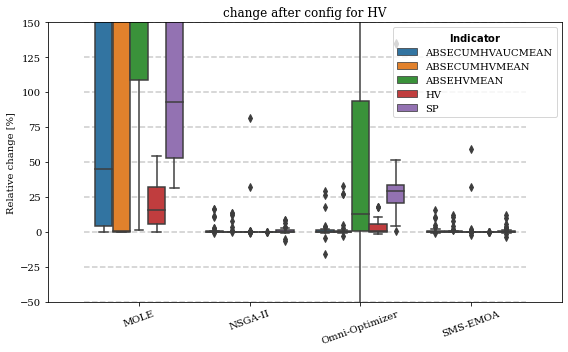

config for SP


change                                       \
indicator      ABSECUMHVAUCMEAN ABSECUMHVMEAN  ABSEHVMEAN         HV   
solver                                                                 
MOLE                  43.247141      0.424751  178.851945  13.769080   
NSGA-II                0.047184     -0.001470   -0.009931  -0.008931   
Omni-Optimizer         0.088104      0.085071   10.718301   0.653877   
SMS-EMOA               0.043877     -0.001571   -0.003350  -0.002487   

                            
indicator               SP  
solver                      
MOLE            103.241013  
NSGA-II          -0.000434  
Omni-Optimizer   30.659822  
SMS-EMOA          0.488934

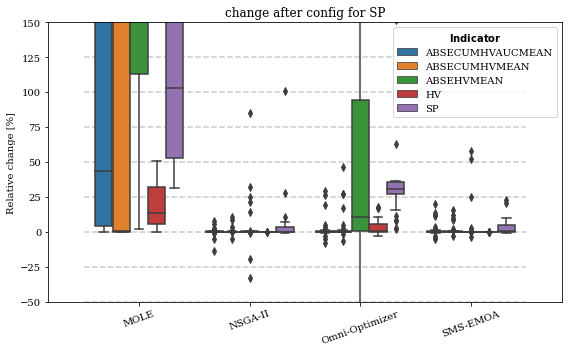

config for ABSEHVMEANNORM


change                                       \
indicator      ABSECUMHVAUCMEAN ABSECUMHVMEAN  ABSEHVMEAN         HV   
solver                                                                 
MOLE                  45.537899      0.393356  161.732007  13.769080   
NSGA-II                0.004338      0.000000   -0.001508  -0.003525   
Omni-Optimizer         0.090569      0.095843    9.207989   0.479796   
SMS-EMOA               0.048471      0.004722   -0.000157  -0.001755   

                           
indicator              SP  
solver                     
MOLE            96.467600  
NSGA-II         -0.000018  
Omni-Optimizer  25.600732  
SMS-EMOA         0.001367

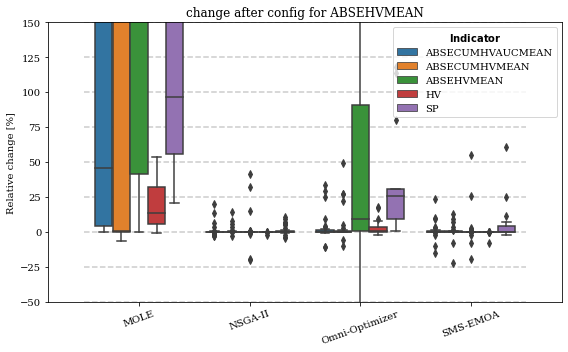

config for ABSECUMHVMEANNORM


change                                       \
indicator      ABSECUMHVAUCMEAN ABSECUMHVMEAN  ABSEHVMEAN         HV   
solver                                                                 
MOLE                  45.511297      0.433107  147.039268  14.579546   
NSGA-II                0.083642      0.007226   -0.001751  -0.000400   
Omni-Optimizer         0.283346      0.073013   10.797405   0.616103   
SMS-EMOA               0.153386      0.007761    0.000095   0.000223   

                           
indicator              SP  
solver                     
MOLE            92.761771  
NSGA-II         -0.000858  
Omni-Optimizer  27.529365  
SMS-EMOA         0.000516

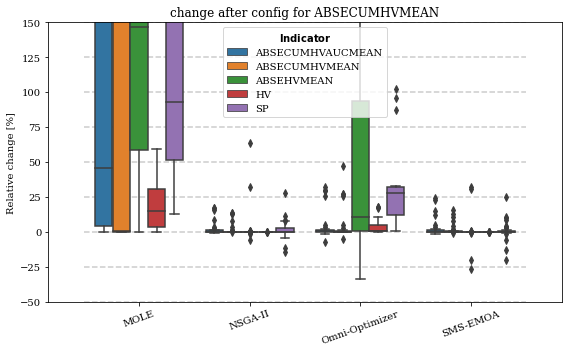

config for ABSECUMHVAUCMEANNORM


change                                       \
indicator      ABSECUMHVAUCMEAN ABSECUMHVMEAN  ABSEHVMEAN         HV   
solver                                                                 
MOLE                  44.921273      0.454007  185.263109  12.997171   
NSGA-II                0.090323      0.000712   -0.000006  -0.002124   
Omni-Optimizer         0.284298      0.059891    5.999962   0.441234   
SMS-EMOA               0.228990      0.010804    0.000838   0.000534   

                           
indicator              SP  
solver                     
MOLE            96.318518  
NSGA-II         -0.000276  
Omni-Optimizer  20.930373  
SMS-EMOA         0.000618

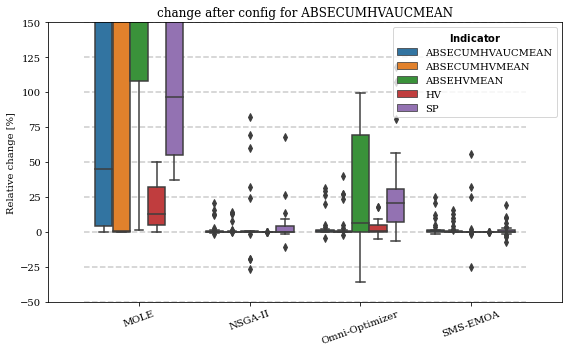

In [705]:
#sns.set_context("paper", rc={"legend.title_fontsize":11, "legend.title_fontweight":"bold"})
#Compute the relative change produced by configuring for HV

for config, target in targets.items():
    tdf = (100*(rddf[f"config-{config}"] - rddf["default"] ) / rddf["default"])
    tdf = tdf.stack().to_frame("change")
    tdf.index.names = ["solver","instance","indicator"]
    tdf = tdf.reset_index()
    tdf["Indicator"] = tdf["indicator"].replace("SPD","SP")
    tdf = tdf.sort_values(["Indicator","solver"])

    #display(tdf)
    print(f"config for {config}")
    display(tdf.groupby(["solver","indicator"]).median().unstack("indicator"))
    
    fig, ax = plt.subplots(figsize=(8,5))
    sns.boxplot(x="solver",y="change",hue="Indicator",data=tdf)
    #ax.set_title(f"Procentual improvement after configuration on HVN")
    ax.set_ylabel("Relative change [%]")
    #ax.set_xlabel("Solver")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
    ax.set_ylim(-50,150)
    ax.set_xlabel(None)
    ax.legend(title="$\\bf Indicator$")
    ax.hlines([p for p in range(-100, 300, 25)],*ax.get_xlim(),color=(0.8, 0.8, 0.8),ls="--",zorder=-10)
    plt.title(f"change after config for {target}")
    plt.tight_layout()
    plt.savefig(f"figures/boxplot_config{target}.pdf")
    plt.show()

# Relative difference

Instead of looking at the change between the resulting config and the default we now look at the difference of a metric under a certain configuration and performance of that metric if we configured for it.



In [706]:
#Step1
rddf = mdf.groupby(["solver","instance"]).median()
rddf.head(2)

config                     default                                \
                  ABSECUMHVAUCMEAN  ABSECUMHVMEAN     ABSEHVMEAN   
solver instance                                                    
MOLE   BiObjBBOB1     9.839296e+09  430603.771659  418832.649880   
       BiObjBBOB2     1.694969e+08  124821.561365  115991.547845   

config                                          config-HVN                \
                             HV        SP ABSECUMHVAUCMEAN ABSECUMHVMEAN   
solver instance                                                            
MOLE   BiObjBBOB1  3.980025e+06  1.010852     1.071550e+11  4.341216e+06   
       BiObjBBOB2  1.174336e+06  1.006332     3.112449e+10  1.265588e+06   

config                                                   ...  \
                     ABSEHVMEAN            HV        SP  ...   
solver instance                                          ...   
MOLE   BiObjBBOB1  1.712015e+06  4.396485e+06  7.725934  ...   
       BiObjBBOB2  2.486078e+05  1.280043e+06  7.460551  ...   

config            config-ABSECUMHVMEANNORM                              \
                          ABSECUMHVAUCMEAN ABSECUMHVMEAN    ABSEHVMEAN   
solver instance                                                          
MOLE   BiObjBBOB1             1.070914e+11  4.340896e+06  1.696350e+06   
       BiObjBBOB2             2.807479e+10  1.264975e+06  1.159915e+05   

config                                    config-ABSECUMHVAUCMEANNORM  \
                             HV        SP            ABSECUMHVAUCMEAN   
solver instance                                                         
MOLE   BiObjBBOB1  4.397201e+06  9.469277                1.067993e+11   
       BiObjBBOB2  1.261143e+06  3.566720                3.102509e+10   

config                                                                
                  ABSECUMHVMEAN    ABSEHVMEAN            HV       SP  
solver instance                                                       
MOLE   BiObjBBOB1  4.341272e+06  1.717989e+06  4.397586e+06  8.47593  
       BiObjBBOB2  1.265579e+06  2.518784e+05  1.283771e+06  6.27957  

[2 rows x 30 columns]

In [707]:
#Step2 compute relative difference
tdf = (100*(rddf["config-HVN"] - rddf["config-SP"] ) / (rddf["config-SP"])).reset_index()

tdf.head(2)
tdf = None
for configfrom, configto in itertools.product(targets,repeat=2):
    print(f"from '{configfrom}' --> to '{configto}'")
    ttdf = (100*(rddf[f"config-{configto}"] - rddf[f"config-{configfrom}"] ) / (rddf[f"config-{configfrom}"])).reset_index()
    ttdf["from"] = configfrom
    ttdf["to"] = configto
    if tdf is None:
        tdf = ttdf
    else:
        tdf = pd.concat([tdf, ttdf], ignore_index=True)
        
diffdf = tdf

diffdf = diffdf.set_index(["solver","instance","from","to"]).unstack(["from","to"])

diffdf.columns

from 'HVN' --> to 'HVN'
from 'HVN' --> to 'SP'
from 'HVN' --> to 'ABSEHVMEANNORM'
from 'HVN' --> to 'ABSECUMHVMEANNORM'
from 'HVN' --> to 'ABSECUMHVAUCMEANNORM'
from 'SP' --> to 'HVN'
from 'SP' --> to 'SP'
from 'SP' --> to 'ABSEHVMEANNORM'
from 'SP' --> to 'ABSECUMHVMEANNORM'
from 'SP' --> to 'ABSECUMHVAUCMEANNORM'
from 'ABSEHVMEANNORM' --> to 'HVN'
from 'ABSEHVMEANNORM' --> to 'SP'
from 'ABSEHVMEANNORM' --> to 'ABSEHVMEANNORM'
from 'ABSEHVMEANNORM' --> to 'ABSECUMHVMEANNORM'
from 'ABSEHVMEANNORM' --> to 'ABSECUMHVAUCMEANNORM'
from 'ABSECUMHVMEANNORM' --> to 'HVN'
from 'ABSECUMHVMEANNORM' --> to 'SP'
from 'ABSECUMHVMEANNORM' --> to 'ABSEHVMEANNORM'
from 'ABSECUMHVMEANNORM' --> to 'ABSECUMHVMEANNORM'
from 'ABSECUMHVMEANNORM' --> to 'ABSECUMHVAUCMEANNORM'
from 'ABSECUMHVAUCMEANNORM' --> to 'HVN'
from 'ABSECUMHVAUCMEANNORM' --> to 'SP'
from 'ABSECUMHVAUCMEANNORM' --> to 'ABSEHVMEANNORM'
from 'ABSECUMHVAUCMEANNORM' --> to 'ABSECUMHVMEANNORM'
from 'ABSECUMHVAUCMEANNORM' --> to 'ABSECUMHVAUC

MultiIndex([('ABSECUMHVAUCMEAN',                  'HVN', ...),
            ('ABSECUMHVAUCMEAN',                  'HVN', ...),
            ('ABSECUMHVAUCMEAN',                  'HVN', ...),
            ('ABSECUMHVAUCMEAN',                  'HVN', ...),
            ('ABSECUMHVAUCMEAN',                  'HVN', ...),
            ('ABSECUMHVAUCMEAN',                   'SP', ...),
            ('ABSECUMHVAUCMEAN',                   'SP', ...),
            ('ABSECUMHVAUCMEAN',                   'SP', ...),
            ('ABSECUMHVAUCMEAN',                   'SP', ...),
            ('ABSECUMHVAUCMEAN',                   'SP', ...),
            ...
            (              'SP',    'ABSECUMHVMEANNORM', ...),
            (              'SP',    'ABSECUMHVMEANNORM', ...),
            (              'SP',    'ABSECUMHVMEANNORM', ...),
            (              'SP',    'ABSECUMHVMEANNORM', ...),
            (              'SP',    'ABSECUMHVMEANNORM', ...),
            (              'SP', 'ABSEC

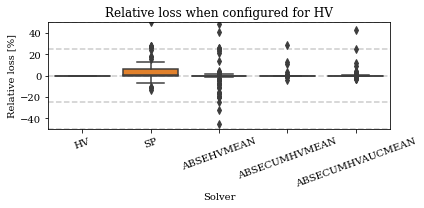

,HV,SP,ABSEHVMEAN,ABSECUMHVMEAN,ABSECUMHVAUCMEAN
count,137.0,137.000000,137.000000,137.000000,137.000000
mean,0.0,7.796514,0.181271,0.381646,0.682008
std,0.0,23.347574,18.740330,2.882329,4.419611
min,0.0,-13.625694,-79.200496,-4.257466,-3.068470
25%,0.0,-0.002918,-0.688194,-0.008107,-0.056715
50%,0.0,1.049988,-0.004450,0.000000,0.001003
75%,0.0,5.950793,0.081776,0.013159,0.096864
max,0.0,180.874418,100.881108,28.812095,42.420949


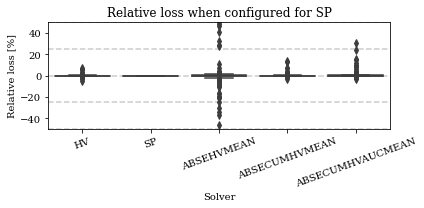

,HV,SP,ABSEHVMEAN,ABSECUMHVMEAN,ABSECUMHVAUCMEAN
count,137.000000,137.0,137.000000,137.000000,137.000000
mean,0.122223,0.0,1.521163,0.392038,1.097647
std,1.145862,0.0,25.214994,1.873225,4.137685
min,-4.998875,0.0,-87.301771,-3.592280,-3.381295
25%,0.000003,0.0,-0.775064,-0.000412,-0.022385
50%,0.009321,0.0,0.000066,0.009141,0.049559
75%,0.066269,0.0,0.172358,0.065124,0.254074
max,6.830564,0.0,150.018156,13.456002,30.697013


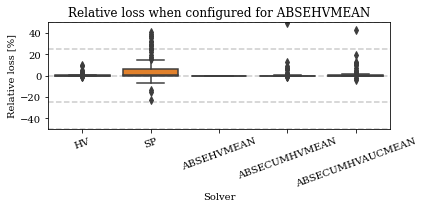

,HV,SP,ABSEHVMEAN,ABSECUMHVMEAN,ABSECUMHVAUCMEAN
count,1.370000e+02,137.000000,137.0,137.000000,137.000000
mean,4.074730e-01,11.449997,0.0,0.782812,1.180204
std,1.352564e+00,38.627801,0.0,4.543946,4.548939
min,-1.188038e+00,-23.343894,0.0,-1.615515,-3.770275
25%,6.863812e-07,-0.019010,0.0,-0.003367,-0.008675
50%,9.634274e-03,0.629240,0.0,0.009456,0.058748
75%,1.610744e-01,5.950654,0.0,0.080408,0.569969
max,9.785430e+00,333.957395,0.0,49.420067,42.488800


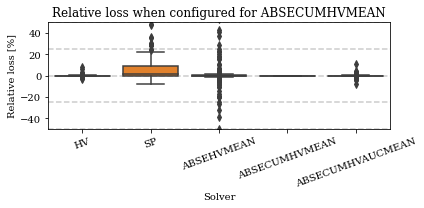

,HV,SP,ABSEHVMEAN,ABSECUMHVMEAN,ABSECUMHVAUCMEAN
count,137.000000,137.000000,137.000000,137.0,137.000000
mean,0.196574,15.373028,5.979322,0.0,0.040314
std,1.086264,43.044709,54.448758,0.0,1.417628
min,-3.044836,-7.831251,-75.309778,0.0,-7.649254
25%,-0.000826,-0.004794,-0.508668,0.0,-0.063466
50%,0.001804,1.146531,-0.001476,0.0,-0.001743
75%,0.083826,9.064203,0.398244,0.0,0.048412
max,7.725179,317.136557,511.619063,0.0,10.508700


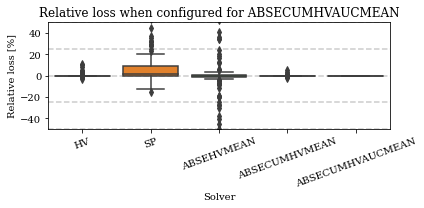

,HV,SP,ABSEHVMEAN,ABSECUMHVMEAN,ABSECUMHVAUCMEAN
count,137.000000,137.000000,137.000000,137.000000,137.0
mean,0.375736,16.454033,2.284659,0.060702,0.0
std,1.672802,65.590172,28.765317,0.605249,0.0
min,-2.894313,-15.323904,-78.380578,-2.498568,0.0
25%,-0.001918,-0.012969,-1.227287,-0.007266,0.0
50%,0.000677,1.101735,-0.001215,0.000291,0.0
75%,0.047778,9.076418,0.593030,0.016793,0.0
max,11.376596,666.883531,195.439471,4.997053,0.0


In [708]:
#Step3: Compute the losses per configuration
rows = {}
for configfrom in targets:
    cols = []
    for config, target in targets.items():
        cols.append(diffdf[(target,configfrom,config)])

    tdf = pd.concat(cols, axis=1)
    tdf.columns = tdf.columns.get_level_values(0)
#     display(tdf.median())
    rows[configfrom] = tdf.mean()
    
    fig, ax = plt.subplots(figsize=(6,3))
    sns.boxplot(x="level_2", y=0, data=tdf.stack().reset_index())
    #tdf.groupby("solver")[target].plot(kind="box")

    ax.set_title(f"Relative loss when configured for {targets[configfrom]}")
    ax.set_ylabel("Relative loss [%]")
    ax.set_xlabel("Solver")
    ax.set_ylim(-50,50)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
    ax.hlines([p for p in range(-100,100,25)],*ax.get_xlim(),color=(0.8,0.8,0.8),ls="--",zorder=-10)
    plt.tight_layout()
    #plt.savefig(f"figures/boxplot_rellos_HV.pdf")
    plt.show()
    
    display(tdf.describe())

In [709]:
#Step4 make table:
tdf = pd.DataFrame(rows).T

print(tdf.T.to_latex(float_format="${:0.2f}$".format, 
                    na_rep="")
      .replace("\$","$")
      .replace("NORM","")
      .replace("config-","")
      .replace("e+0","^")
     .replace("ABSE",""))

\begin{tabular}{lrrrrr}
\toprule
{} &    HVN &     SP &  HVMEAN &  CUMHVMEAN &  CUMHVAUCMEAN \\
\midrule
HV               & $0.00$ & $0.12$ &          $0.41$ &             $0.20$ &                $0.38$ \\
SP               & $7.80$ & $0.00$ &         $11.45$ &            $15.37$ &               $16.45$ \\
HVMEAN       & $0.18$ & $1.52$ &          $0.00$ &             $5.98$ &                $2.28$ \\
CUMHVMEAN    & $0.38$ & $0.39$ &          $0.78$ &             $0.00$ &                $0.06$ \\
CUMHVAUCMEAN & $0.68$ & $1.10$ &          $1.18$ &             $0.04$ &                $0.00$ \\
\bottomrule
\end{tabular}



In [710]:
# rddf = mdf.groupby(["solver","instance"]).median()
# alpha = 0.1
# print("ALPHA = 0.1")
# print("SIGNIFICANT CHANGE FOR HV BETWEEN default AND config-HVN")
# print(stats.wilcoxon(mdf["config-HVN"]["HV"].to_list(),mdf["default"]["HV"].to_list()).pvalue)
# for solver, gdf in rddf.groupby("solver"):
#     test = stats.wilcoxon(gdf["config-HVN"]["HV"].to_list(),gdf["default"]["HV"].to_list())
#     if test.pvalue < alpha:
#         print(" > ",solver, test.pvalue)
# print("\n")

# print("SIGNIFICANT CHANGE FOR SP BETWEEN default AND config-HVN")
# print(stats.wilcoxon(mdf["config-HVN"]["SPD"].to_list(),mdf["default"]["SPD"].to_list()).pvalue)
# for solver, gdf in rddf.groupby("solver"):
#     test = stats.wilcoxon(gdf["config-HVN"]["SPD"].to_list(),gdf["default"]["SPD"].to_list())
#     if test.pvalue < alpha:
#         print(" > ",solver, test.pvalue)
# print("\n\n")

# print("SIGNIFICANT CHANGE FOR HV BETWEEN default AND config-SPD")
# print(stats.wilcoxon(mdf["config-SPD"]["HV"].to_list(),mdf["default"]["HV"].to_list()).pvalue)
# for solver, gdf in rddf.groupby("solver"):
#     test = stats.wilcoxon(gdf["config-SPD"]["HV"].to_list(),gdf["default"]["HV"].to_list())
#     if test.pvalue < 0.1:
#         print(" > ",solver, test.pvalue)
# print("\n")

# print("SIGNIFICANT CHANGE FOR SP BETWEEN default AND config-SPD")
# print(stats.wilcoxon(mdf["config-SPD"]["SPD"].to_list(),mdf["default"]["SPD"].to_list()).pvalue)
# for solver, gdf in rddf.groupby("solver"):
#     test = stats.wilcoxon(gdf["config-SPD"]["SPD"].to_list(),gdf["default"]["SPD"].to_list())
#     if test.pvalue < alpha:
#         print(" > ",solver, test.pvalue)
# print("\n\n")
    


# print("SIGNIFICANT RELATIVE LOSS FOR HV")
# print(stats.wilcoxon(mdf["config-HVN"]["HV"].to_list(),mdf["config-SPD"]["HV"].to_list()).pvalue)
# for solver, gdf in rddf.groupby("solver"):
#     test = stats.wilcoxon(gdf["config-HVN"]["HV"].to_list(),gdf["config-SPD"]["HV"].to_list())
#     if test.pvalue < alpha:
#         print(" > ",solver, test.pvalue)
    
# print("\n\nSIGNIFICANT RELATIVE LOSS FOR SP")
# print(stats.wilcoxon(mdf["config-HVN"]["SPD"].to_list(),mdf["config-SPD"]["SPD"].to_list()).pvalue)
# for solver, gdf in rddf.groupby("solver"):
#     test = stats.wilcoxon(gdf["config-HVN"]["SPD"].to_list(),gdf["config-SPD"]["SPD"].to_list())
#     if test.pvalue < alpha:
#         print(" > ",solver, test.pvalue)

# Ranking

In [711]:
#https://github.com/biolab/orange3/blob/master/Orange/evaluation/scoring.py
def compute_CD(avranks, n, alpha="0.05", test="nemenyi"):
    """
    Returns critical difference for Nemenyi or Bonferroni-Dunn test
    according to given alpha (either alpha="0.05" or alpha="0.1") for average
    ranks and number of tested datasets N. Test can be either "nemenyi" for
    for Nemenyi two tailed test or "bonferroni-dunn" for Bonferroni-Dunn test.
    """
    k = len(avranks)
    d = {("nemenyi", "0.05"): [0, 0, 1.959964, 2.343701, 2.569032, 2.727774,
                               2.849705, 2.94832, 3.030879, 3.101730, 3.163684,
                               3.218654, 3.268004, 3.312739, 3.353618, 3.39123,
                               3.426041, 3.458425, 3.488685, 3.517073,
                               3.543799],
         ("nemenyi", "0.1"): [0, 0, 1.644854, 2.052293, 2.291341, 2.459516,
                              2.588521, 2.692732, 2.779884, 2.854606, 2.919889,
                              2.977768, 3.029694, 3.076733, 3.119693, 3.159199,
                              3.195743, 3.229723, 3.261461, 3.291224, 3.319233],
         ("bonferroni-dunn", "0.05"): [0, 0, 1.960, 2.241, 2.394, 2.498, 2.576,
                                       2.638, 2.690, 2.724, 2.773],
         ("bonferroni-dunn", "0.1"): [0, 0, 1.645, 1.960, 2.128, 2.241, 2.326,
                                      2.394, 2.450, 2.498, 2.539]}
    q = d[(test, alpha)]
    cd = q[k] * (k * (k + 1) / (6.0 * n)) ** 0.5
    return cd

def graph_ranks(avranks, names, cd=None, cdmethod=None, lowv=None, highv=None,
                width=6, textspace=1, reverse=False, filename=None, ax=None, **kwargs):
    """
    Draws a CD graph, which is used to display  the differences in methods'
    performance. See Janez Demsar, Statistical Comparisons of Classifiers over
    Multiple Data Sets, 7(Jan):1--30, 2006.

    Needs matplotlib to work.

    The image is ploted on `plt` imported using
    `import matplotlib.pyplot as plt`.

    Args:
        avranks (list of float): average ranks of methods.
        names (list of str): names of methods.
        cd (float): Critical difference used for statistically significance of
            difference between methods.
        cdmethod (int, optional): the method that is compared with other methods
            If omitted, show pairwise comparison of methods
        lowv (int, optional): the lowest shown rank
        highv (int, optional): the highest shown rank
        width (int, optional): default width in inches (default: 6)
        textspace (int, optional): space on figure sides (in inches) for the
            method names (default: 1)
        reverse (bool, optional):  if set to `True`, the lowest rank is on the
            right (default: `False`)
        filename (str, optional): output file name (with extension). If not
            given, the function does not write a file.
    """
    try:
        import matplotlib.pyplot as plt
        from matplotlib.backends.backend_agg import FigureCanvasAgg
    except ImportError:
        raise ImportError("Function graph_ranks requires matplotlib.")

    width = float(width)
    textspace = float(textspace)

    def nth(l, n):
        """
        Returns only nth elemnt in a list.
        """
        n = lloc(l, n)
        return [a[n] for a in l]

    def lloc(l, n):
        """
        List location in list of list structure.
        Enable the use of negative locations:
        -1 is the last element, -2 second last...
        """
        if n < 0:
            return len(l[0]) + n
        else:
            return n

    def mxrange(lr):
        """
        Multiple xranges. Can be used to traverse matrices.
        This function is very slow due to unknown number of
        parameters.

        >>> mxrange([3,5])
        [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

        >>> mxrange([[3,5,1],[9,0,-3]])
        [(3, 9), (3, 6), (3, 3), (4, 9), (4, 6), (4, 3)]

        """
        if not len(lr):
            yield ()
        else:
            # it can work with single numbers
            index = lr[0]
            if isinstance(index, int):
                index = [index]
            for a in range(*index):
                for b in mxrange(lr[1:]):
                    yield tuple([a] + list(b))

    def print_figure(fig, *args, **kwargs):
        canvas = FigureCanvasAgg(fig)
        canvas.print_figure(*args, **kwargs)

    sums = avranks

    tempsort = sorted([(a, i) for i, a in enumerate(sums)], reverse=reverse)
    ssums = nth(tempsort, 0)
    sortidx = nth(tempsort, 1)
    nnames = [names[x] for x in sortidx]

    if lowv is None:
        lowv = min(1, int(math.floor(min(ssums))))
    if highv is None:
        highv = max(len(avranks), int(math.ceil(max(ssums))))

    cline = 0.4

    k = len(sums)

    lines = None

    linesblank = 0
    scalewidth = width - 2 * textspace

    def rankpos(rank):
        if not reverse:
            a = rank - lowv
        else:
            a = highv - rank
        return textspace + scalewidth / (highv - lowv) * a

    distanceh = 0.25

    if cd and cdmethod is None:
        # get pairs of non significant methods

        def get_lines(sums, hsd):
            # get all pairs
            lsums = len(sums)
            allpairs = [(i, j) for i, j in mxrange([[lsums], [lsums]]) if j > i]
            # remove not significant
            notSig = [(i, j) for i, j in allpairs
                      if abs(sums[i] - sums[j]) <= hsd]
            # keep only longest

            def no_longer(ij_tuple, notSig):
                i, j = ij_tuple
                for i1, j1 in notSig:
                    if (i1 <= i and j1 > j) or (i1 < i and j1 >= j):
                        return False
                return True

            longest = [(i, j) for i, j in notSig if no_longer((i, j), notSig)]

            return longest

        lines = get_lines(ssums, cd)
        linesblank = 0.2 + 0.2 + (len(lines) - 1) * 0.1

        # add scale
        distanceh = 0.25
        cline += distanceh

    # calculate height needed height of an image
    minnotsignificant = max(2 * 0.2, linesblank)
    height = cline + ((k + 1) / 2) * 0.2 + minnotsignificant

    if ax is None:
        fig = plt.figure(figsize=(width, height))
        fig.set_facecolor('white')
        ax = fig.add_axes([0, 0, 1, 1])  # reverse y axis
    
    ax.set_axis_off()

    hf = 1. / height  # height factor
    wf = 1. / width

    def hfl(l):
        return [a * hf for a in l]

    def wfl(l):
        return [a * wf for a in l]


    # Upper left corner is (0,0).
    ax.plot([0, 1], [0, 1], c="w")
    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)

    def line(l, color='k', **kwargs):
        """
        Input is a list of pairs of points.
        """
        ax.plot(wfl(nth(l, 0)), hfl(nth(l, 1)), color=color, **kwargs)

    def text(x, y, s, *args, **kwargs):
        ax.text(wf * x, hf * y, s, *args, **kwargs)

    #Main line
    line([(textspace, cline), (width - textspace, cline)], linewidth=0.7)

    bigtick = 0.1
    smalltick = 0.05
    
    #Line ticks
    tick = None
    for a in list(np.arange(lowv, highv, 0.5)) + [highv]:
        tick = smalltick
        if a == int(a):
            tick = bigtick
        line([(rankpos(a), cline - tick / 2),
              (rankpos(a), cline)],
             linewidth=0.7)

    #Rank numbers
    for a in range(lowv, highv + 1):
        text(rankpos(a), cline - tick / 2 - 0.05, str(a),
             ha="center", va="bottom")

    k = len(ssums)
    
    def namestring(name, rank):
#         name = name if len(name) <= 7 else name[:6]+"..."
        return f"{name} ({rank:.1f})"

    #Left side rank names
    
    textline = min([rankpos(x) for x in ssums[:math.ceil(k / 2)]])
#     print(textline)
    
    for i in range(math.ceil(k / 2)):
        chei = cline + minnotsignificant + i * 0.2
        
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textline - 0.5, chei)],
              #(textspace - 0.1, chei)],
             linewidth=0.7)
        #text(textspace - 0.2, chei, namestring(nnames[i], ssums[i]), ha="right", va="center")
        text(textline - 0.6, chei, namestring(nnames[i], ssums[i]), ha="right", va="center")


    #Right side rank names
    textline = max([rankpos(x) for x in ssums[math.ceil(k / 2):]])
#     print(textline)
    for i in range(math.ceil(k / 2), k):
        chei = cline + minnotsignificant + (k - i - 1) * 0.2
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textline + 0.5, chei)],
              #(textspace + scalewidth + 0.1, chei)],
             linewidth=0.7)
        #text(textspace + scalewidth + 0.2, chei, namestring(nnames[i], ssums[i]), ha="left", va="center")
        text(textline + 0.6, chei, namestring(nnames[i], ssums[i]), ha="left", va="center")


    if cd and cdmethod is None:
        # upper scale
        if not reverse:
            begin, end = rankpos(lowv), rankpos(lowv + cd)
        else:
            begin, end = rankpos(highv), rankpos(highv - cd)

        cddistance = cline + 0.1
            
        line([(begin, cddistance), (end, cddistance)], linewidth=0.7)
        line([(begin, cddistance + bigtick / 2),
              (begin, cddistance - bigtick / 2)],
             linewidth=0.7)
        line([(end, cddistance + bigtick / 2),
              (end, cddistance - bigtick / 2)],
             linewidth=0.7)
        text((begin + end) / 2, cddistance + 0.1, "CD",
             ha="center", va="top")

        # no-significance lines
        def draw_lines(lines, side=0.05, height=0.1):
            start = cline + 0.2
            for l, r in lines:
                line([(rankpos(ssums[l]) - side, start),
                      (rankpos(ssums[r]) + side, start)],
                     linewidth=2.5)
                start += height

        draw_lines(lines)

    elif cd:
        begin = rankpos(avranks[cdmethod] - cd)
        end = rankpos(avranks[cdmethod] + cd)
        line([(begin, cline), (end, cline)],
             linewidth=2.5)
        line([(begin, cline + bigtick / 2),
              (begin, cline - bigtick / 2)],
             linewidth=2.5)
        line([(end, cline + bigtick / 2),
              (end, cline - bigtick / 2)],
             linewidth=2.5)

    if filename:
        print_figure(fig, filename, **kwargs)


In [712]:
def colored_graph_ranks(avranks, names, cd=None, cdmethod=None, lowv=None, highv=None,
                width=6, textspace=0.5, reverse=False, filename=None, ax=None, **kwargs):
    try:
        import matplotlib.pyplot as plt
        from matplotlib.backends.backend_agg import FigureCanvasAgg
    except ImportError:
        raise ImportError("Function graph_ranks requires matplotlib.")
        
    width = float(width)
    textspace = float(textspace)

    def nth(l, n):
        """
        Returns only nth elemnt in a list.
        """
        n = lloc(l, n)
        return [a[n] for a in l]

    def lloc(l, n):
        """
        List location in list of list structure.
        Enable the use of negative locations:
        -1 is the last element, -2 second last...
        """
        if n < 0:
            return len(l[0]) + n
        else:
            return n

    def mxrange(lr):
        """
        Multiple xranges. Can be used to traverse matrices.
        This function is very slow due to unknown number of
        parameters.

        >>> mxrange([3,5])
        [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

        >>> mxrange([[3,5,1],[9,0,-3]])
        [(3, 9), (3, 6), (3, 3), (4, 9), (4, 6), (4, 3)]

        """
        if not len(lr):
            yield ()
        else:
            # it can work with single numbers
            index = lr[0]
            if isinstance(index, int):
                index = [index]
            for a in range(*index):
                for b in mxrange(lr[1:]):
                    yield tuple([a] + list(b))

    def print_figure(fig, *args, **kwargs):
        canvas = FigureCanvasAgg(fig)
        canvas.print_figure(*args, **kwargs)
        
    sums = avranks

    tempsort = sorted([(a, i) for i, a in enumerate(sums)], reverse=reverse)
    ssums = nth(tempsort, 0)
    sortidx = nth(tempsort, 1)
    nnames = [names[x] for x in sortidx]

    if lowv is None:
        lowv = min(1, int(math.floor(min(ssums))))
    if highv is None:
        highv = max(len(avranks), int(math.ceil(max(ssums))))

    cline = 0.2
    margin = 0.05

    k = len(sums)

    lines = None

    linesblank = 0
    scalewidth = width - 2 * textspace

    def rankpos(rank):
        if not reverse:
            a = rank - lowv
        else:
            a = highv - rank
        return textspace + scalewidth / (highv - lowv) * a

    distanceh = 0.25
    
#     if cd and cdmethod is None:
#         # get pairs of non significant methods

#         def get_lines(sums, hsd):
#             # get all pairs
#             lsums = len(sums)
#             allpairs = [(i, j) for i, j in mxrange([[lsums], [lsums]]) if j > i]
#             # remove not significant
#             notSig = [(i, j) for i, j in allpairs
#                       if abs(sums[i] - sums[j]) <= hsd]
#             # keep only longest

#             def no_longer(ij_tuple, notSig):
#                 i, j = ij_tuple
#                 for i1, j1 in notSig:
#                     if (i1 <= i and j1 > j) or (i1 < i and j1 >= j):
#                         return False
#                 return True

#             longest = [(i, j) for i, j in notSig if no_longer((i, j), notSig)]

#             return longest

#         lines = get_lines(ssums, cd)
#         linesblank = 0.2 + 0.2 + (len(lines) - 1) * 0.1

#         # add scale
#         distanceh = 0.25
#         cline += distanceh

    # calculate height needed height of an image
    minnotsignificant = max(2 * 0.2, linesblank)
    height = cline + ((k + 1) / 2) * 0.2 + minnotsignificant

    if ax is None:
        fig = plt.figure(figsize=(width, height))
        fig.set_facecolor('white')
        ax = fig.add_axes([0, 0, 1, 1])  # reverse y axis
    
    ax.set_axis_off()
    #ax.set_facecolor('xkcd:salmon')
    hf = 1. / height  # height factor
    wf = 1. / width

    def hfl(l):
        return [a * hf for a in l]

    def wfl(l):
        return [a * wf for a in l]


    # Upper left corner is (0,0).
    ax.plot([0, 1], [0, 1], c="w", zorder=-1)
    ax.set_xlim(0-margin, 1+margin)
    ax.set_ylim(1, 0)

    def line(l, color='k', **kwargs):
        """
        Input is a list of pairs of points.
        """
        ax.plot(wfl(nth(l, 0)), hfl(nth(l, 1)), color=color, **kwargs)

    def text(x, y, s, *args, **kwargs):
        ax.text(wf * x, hf * y, s, *args, **kwargs)

    #Main line
    line([(textspace, cline), (width - textspace, cline)], linewidth=0.7)

    bigtick = 0.1
    smalltick = 0.05
    
    #Line ticks
    tick = None
    for a in list(np.arange(lowv, highv, 0.5)) + [highv]:
        tick = smalltick
        if a == int(a):
            tick = bigtick
        line([(rankpos(a), cline - tick / 2),
              (rankpos(a), cline)],
             linewidth=0.7)

    #Rank numbers
    for a in range(lowv, highv + 1):
        text(rankpos(a), cline - tick / 2 - 0.05, str(a),
             ha="center", va="bottom")

    k = len(ssums)
    depths = [cline+0.3+(0.15*i) for i in range(len(avranks))]
    points = list(zip(avranks, depths))
    colors = []
    markers = []
    for n in names:
        for _,s in stylemap.items():
            if s["label"] == n:
                colors.append(s["color"])
                markers.append(s["marker"])
    ax.scatter(wfl(nth(points, 0)),hfl(nth(points, 1)), s=(50*wf)**2, alpha=1, c=colors, marker="o")
    
    for x,y in points:
        line([(x,cline),(x,y)], linewidth=1, zorder=-1)
    
    if cd and cdmethod is None:
        # upper scale
        if not reverse:
            begin, end = rankpos(lowv), rankpos(lowv + cd)
        else:
            begin, end = rankpos(highv), rankpos(highv - cd)

        cddistance = cline + 0.1
         
        #CD legend
#         line([(begin, cddistance), (end, cddistance)], linewidth=0.7)
#         line([(begin, cddistance + bigtick / 2),
#               (begin, cddistance - bigtick / 2)],
#              linewidth=0.7)
#         line([(end, cddistance + bigtick / 2),
#               (end, cddistance - bigtick / 2)],
#              linewidth=0.7)
#         text((begin + end) / 2, cddistance + 0.1, "CD", ha="center", va="top")

        lines = []
    
        cdt = cd * 1.5
        for i,j in itertools.combinations(avranks,r=2):
            if abs(i-j) < cd:
                #print(i,j)
                start = ( min(i,j)+(abs(i-j)/2) ) - (cdt/2)
                #print(start)
                lines.append(start)
        for l, s in enumerate(lines):
            print(l,s)
            line([(s,cline+.1), (s+cdt,cline+.1)], linewidth=2.5)
            

ranks = tdf[(tdf["config"] == "config-ABSECUMHVAUCMEANNORM") & (tdf["target"] == "ABSECUMHVAUCMEAN")].mean(axis=0)
display(ranks)
names = list(ranks.keys())
avranks = ranks.tolist()
cd = compute_CD(avranks, len(tdf), alpha="0.1", test="nemenyi") #tested on 14 datasets 
cd = 0.15
#print("cd=",cd)
fig, ax = plt.subplots(1)
colored_graph_ranks(avranks, names, cd=cd, width=6, textspace=0, cdmethod=None, ax=ax)
plt.show()

KeyError: 'config'

In [713]:
def plot_ranking(df, title="", save=None, ax=None):
    #{k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
    ranks = {}
    
    for key, row in df.iterrows():
        row = row.to_dict()
        ranks[key] = {k: n+1 for n, (k, v) in enumerate(sorted(row.items(), key=lambda item: item[1])[::-1])}

    rdf = pd.DataFrame(ranks)
    #display(df.transpose())
    #display(rdf)
    ranks = rdf.mean(axis=1)

    names = list(ranks.keys())
    avranks = ranks.tolist()
    #display(ranks)
    #display(len(df))
    #print(sum(avranks))
    cd = compute_CD(avranks, len(df), alpha="0.1", test="nemenyi") #tested on 14 datasets 
    #print("cd=",cd)
    graph_ranks(avranks, names, cd=cd, width=6, textspace=0, cdmethod=None, ax=ax,)
    if ax is None:
        plt.title(title)
        #plt.text(0.1,0,f"CD: {cd:.5f}",color="red",fontsize="large")
        if save is not None:
            plt.savefig(save,bbox_inches='tight')
        plt.show()
    else:
        ax.set_title(title,y=-0.1)

In [714]:
import scipy
import scikit_posthocs
tdf = mdf.unstack("solver").dropna().reset_index(drop=True) 
scipy.stats.friedmanchisquare(*tdf["default"]["HV"].to_numpy().T.tolist())
display(scikit_posthocs.posthoc_nemenyi_friedman(tdf["default"]["HV"]))
# scikit_posthocs.posthoc_nemenyi(tdf["default"]["HV"])
compute_CD([2.4]*4, len(df), alpha="0.1", test="nemenyi")

,MOLE,NSGA-II,Omni-Optimizer,SMS-EMOA
MOLE,1.000,0.001000,0.001000,0.001
NSGA-II,0.001,1.000000,0.001212,0.001
Omni-Optimizer,0.001,0.001212,1.000000,0.001
SMS-EMOA,0.001,0.001000,0.001000,1.000


0.029040167665989474

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_9870/912804139.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  ttdf = ttdf.unstack(["config"]).swaplevel(axis='columns').sort_index(1)


config-HVN


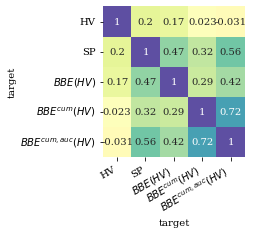

config-SP
1


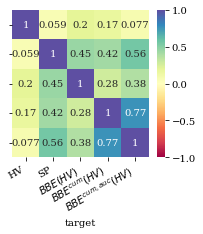

In [715]:
heatmapargs = {"annot": True, "vmin":-1, "vmax":1, "cmap":sns.color_palette("Spectral", as_cmap=True)}

mapper = {"ABSEHVMEAN": "$BBE(HV)$", "ABSECUMHVMEAN": "$BBE^{cum}(HV)$", "ABSECUMHVAUCMEAN": "$BBE^{cum,auc}(HV)$"}

#Compute the average rankings for each config,target,instance pair
tdf = mdf.unstack(["solver","instance"]).fillna(-np.inf).reset_index(drop=True).stack([0,1,3])
ranks = {}
for key, row in tdf.iterrows():
    row = row.to_dict()
    ranks[key] = {k: n+1 for n, (k, v) in enumerate(sorted(row.items(), key=lambda item: item[1])[::-1])}
tdf = pd.DataFrame(ranks).T
tdf = tdf.reset_index().drop("level_0",axis=1).rename({"level_1":"config", "level_2":"target", "level_3":"instance"}, axis=1)
#display(tdf)
ttdf = tdf.groupby(["config","target","instance"]).mean()
# for config in 
ttdf = ttdf.unstack(["config"]).swaplevel(axis='columns').sort_index(1)
#display(ttdf)

# Make a correlation plot of how each of the ranking changes correlate with each other
configs = list(targets.keys())[:2]
for i, config in enumerate(configs):
    config = f"config-{config}"
    print(config)
    gdf = ttdf["default"] - ttdf[config] #if the rank is lower than previously it is better
#     display(gdf.unstack("instance").T)
    width = 4.5 if i == 0 else 3.8
    cbar = False
    if i+1 == len(configs):
        cbar = True
#         width += 0.9
    figsize = [width,4.2]
    figsize = [s*0.8 for s in figsize]
    fig, ax = plt.subplots(1, figsize=tuple(figsize))
    tgdf = gdf.unstack("instance").T
    tgdf = tgdf.rename(columns=mapper)
    
    metrics = ["HV", "SP", "$BBE(HV)$", "$BBE^{cum}(HV)$", "$BBE^{cum,auc}(HV)$"]
    sns.heatmap(tgdf[metrics].corr("spearman"), **heatmapargs, cbar=cbar)
#     ax.set_title(f"Correlation plot of rank changes after {config}")
    if i != 0:
        print(i)
        ax.set_yticklabels([])
        ax.set_ylabel("")
        
#     for ticks in [ax.get_xticklabels(), ax.get_yticklabels()]:
#         print(ticks)
#         for i in range(len(ticks)):
#             ticktext = ticks[i].get_text()
#             ticktext = ticktext.replace("ABSEHVMEAN","$BBE(HV)$")
#             ticktext = ticktext.replace("ABSECUMHVMEAN","$BBE^{cum}(HV)$")
#             ticktext = ticktext.replace("ABSECUMHVAUCMEAN","$BBE^{cum,auc}(HV)$")
#             ticks[i].set(text=ticktext)
#         print(ticks)
        
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    ax.set_aspect('auto')
    
    
    plt.tight_layout()
    plt.savefig(f"figures/ranking_change_correlation_{config}.pdf")
    plt.show()
    
    
    
# for (target, config), gdf in ttdf.stack("config").reset_index().groupby(["target", "config"]):
#     display(gdf)
#     fig, ax = plt.subplots(1, figsize=(6,6))
#     ax.set_aspect('auto')
#     metrics = ["HV", "SP", "ABSEHVMEAN", "ABSECUMHVMEAN", "ABSECUMHVAUCMEAN"]
#     sns.heatmap(gdf.T[metrics].corr("spearman"), annot = True)
#     ax.set_title(f"Correlation plot (all)")
#     plt.tight_layout()
#     plt.show()


In [716]:
#compute the rankings for each scenario (config, seed, target)
tdf = mdf.unstack("solver").dropna().reset_index(drop=True) 
tdf = tdf.stack([0, 1])
ranks = {}
for key, row in tdf.iterrows():
    row = row.to_dict()
    ranks[key] = {k: n+1 for n, (k, v) in enumerate(sorted(row.items(), key=lambda item: item[1])[::-1])}
tdf = pd.DataFrame(ranks).T
tdf = tdf.reset_index().drop("level_0",axis=1).rename({"level_1":"config", "level_2":"target"}, axis=1)
tdf

,config,target,Omni-Optimizer,NSGA-II,SMS-EMOA,MOLE
0,default,ABSECUMHVAUCMEAN,1,2,3,4
1,default,ABSECUMHVMEAN,2,1,3,4
2,default,ABSEHVMEAN,1,2,3,4
3,default,HV,1,2,3,4
4,default,SP,3,1,2,4
...,...,...,...,...,...,...
23665,config-ABSECUMHVAUCMEANNORM,ABSECUMHVAUCMEAN,3,2,1,4
23666,config-ABSECUMHVAUCMEANNORM,ABSECUMHVMEAN,3,4,2,1
23667,config-ABSECUMHVAUCMEANNORM,ABSEHVMEAN,1,4,3,2
23668,config-ABSECUMHVAUCMEANNORM,HV,1,3,2,4


In [717]:
import re

#Compute the ranking difference with the default average rankings
ttdf = tdf.groupby(["config","target"]).mean()
# for config in 
ttdf = ttdf.unstack("config").swaplevel(axis='columns').sort_index(1)
# display(ttdf.T)

for config in targets.keys():
    config = f"config-{config}"
#     print(config)
    cell = ttdf[config]
    cell = ttdf["default"] - ttdf[config]
    ttdf[config] = cell #if the rank is lower than previously it is better

ttdf = ttdf.T.swaplevel().sort_index(0).unstack("config").stack("target")
display(ttdf[config_order].reset_index().set_index("target").groupby("level_0").mean())


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_9870/3576252144.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  ttdf = ttdf.unstack("config").swaplevel(axis='columns').sort_index(1)
/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_9870/3576252144.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  ttdf = ttdf.T.swaplevel().sort_index(0).unstack("config").stack("target")


config,default,config-HVN,config-SP,config-ABSEHVMEANNORM,config-ABSECUMHVMEANNORM,config-ABSECUMHVAUCMEANNORM
level_0,,,,,,
MOLE,3.578707,1.087959,1.147782,1.100127,0.937136,1.021546
NSGA-II,2.086946,-0.637262,-0.800000,-0.741698,-0.592902,-0.728517
Omni-Optimizer,2.249683,0.047148,0.123701,0.173638,0.147275,0.089227
SMS-EMOA,2.084664,-0.497845,-0.471483,-0.532066,-0.491508,-0.382256


In [718]:
import re

#Compute the ranking difference with the default average rankings
ttdf = tdf.groupby(["config","target"]).mean()
# for config in 
ttdf = ttdf.unstack("config").swaplevel(axis='columns').sort_index(1)
# display(ttdf.T)

for config in targets.keys():
    config = f"config-{config}"
#     print(config)
    cell = ttdf[config]
    cell[ttdf["default"] - ttdf[config] < 0] *= -1
    ttdf[config] = cell #if the rank is lower than previously it is better

ttdf = ttdf.T.swaplevel().sort_index(0).unstack("config").stack("target")
display(ttdf.swaplevel().sort_index()[config_order])

latex = ttdf.swaplevel().sort_index()[config_order].to_latex(float_format="${:0.2f}$".format, 
                    na_rep="").replace("\$","$")
    
latex = re.sub(f"\$\W*&\W*\$-","$ & \\\cellcolor{red!25}$",latex)
latex = re.sub(f"\$\W*&\W*\$","$ & \\\cellcolor{green!25}$",latex)
latex = latex.replace("NORM","").replace("config-","").replace("e+0","^").replace("ABSE","")

print(latex)

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_9870/2921906638.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  ttdf = ttdf.unstack("config").swaplevel(axis='columns').sort_index(1)
/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_9870/2921906638.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell[ttdf["default"] - ttdf[config] < 0] *= -1
/Users/jeroen/Software/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se

config                            default  config-HVN  config-SP  \
target                                                             
ABSECUMHVAUCMEAN MOLE            3.699620    2.072243   2.140684   
                 NSGA-II         1.925222   -2.631179  -2.705957   
                 Omni-Optimizer  2.366286   -2.718631  -2.413181   
                 SMS-EMOA        2.008872   -2.577947  -2.740177   
ABSECUMHVMEAN    MOLE            2.880862    2.044360   2.027883   
                 NSGA-II         2.087452   -2.544994  -2.926489   
                 Omni-Optimizer  2.669202   -2.693283   2.425856   
                 SMS-EMOA        2.362484   -2.717364  -2.619772   
ABSEHVMEAN       MOLE            3.666667    2.913815   2.870722   
                 NSGA-II         2.258555   -2.707224  -2.749049   
                 Omni-Optimizer  2.032953    1.993663   2.031686   
                 SMS-EMOA        2.041825   -2.385298  -2.348542   
HV               MOLE            3.724968   -3.745247  -3.750317   
                 NSGA-II         2.380228   -2.495564  -2.494297   
                 Omni-Optimizer  2.139417    1.904943   1.923954   
                 SMS-EMOA        1.755387   -1.854246  -1.831432   
SP               MOLE            3.921420    1.678074   1.365019   
                 NSGA-II         1.783270   -3.242079  -3.558935   
                 Omni-Optimizer  2.040558    1.702155   1.835234   
                 SMS-EMOA        2.254753   -3.377693  -3.240811   

config                           config-ABSEHVMEANNORM  \
target                                                   
ABSECUMHVAUCMEAN MOLE                         2.125475   
                 NSGA-II                     -2.798479   
                 Omni-Optimizer              -2.439797   
                 SMS-EMOA                    -2.636248   
ABSECUMHVMEAN    MOLE                         1.968314   
                 NSGA-II                     -2.731305   
                 Omni-Optimizer               2.380228   
                 SMS-EMOA                    -2.920152   
ABSEHVMEAN       MOLE                         2.954373   
                 NSGA-II                     -2.821293   
                 Omni-Optimizer               1.804816   
                 SMS-EMOA                    -2.419518   
HV               MOLE                        -3.745247   
                 NSGA-II                     -2.447402   
                 Omni-Optimizer               1.923954   
                 SMS-EMOA                    -1.883397   
SP               MOLE                         1.599493   
                 NSGA-II                     -3.344740   
                 Omni-Optimizer               1.831432   
                 SMS-EMOA                    -3.224335   

config                           config-ABSECUMHVMEANNORM  \
target                                                      
ABSECUMHVAUCMEAN MOLE                            2.361217   
                 NSGA-II                        -2.522180   
                 Omni-Optimizer                 -2.624842   
                 SMS-EMOA                       -2.491762   
ABSECUMHVMEAN    MOLE                            2.190114   
                 NSGA-II                        -2.542459   
                 Omni-Optimizer                  2.565272   
                 SMS-EMOA                       -2.702155   
ABSEHVMEAN       MOLE                            2.996198   
                 NSGA-II                        -2.704689   
                 Omni-Optimizer                  1.806084   
                 SMS-EMOA                       -2.493029   
HV               MOLE                           -3.768061   
                 NSGA-II                        -2.527250   
                 Omni-Optimizer                  1.888466   
                 SMS-EMOA                       -1.816223   
SP               MOLE                            1.892269   
                 NSGA-II                        -3.102662   
      

\begin{tabular}{llrrrrrr}
\toprule
   & config &  default &  HVN &  SP &  HVMEAN &  CUMHVMEAN &  CUMHVAUCMEAN \\
target & {} &          &             &            &                        &                           &                              \\
\midrule
CUMHVAUCMEAN & MOLE &   $3.70$ & \cellcolor{green!25}$2.07$ & \cellcolor{green!25}$2.14$ & \cellcolor{green!25}$2.13$ & \cellcolor{green!25}$2.36$ & \cellcolor{green!25}$2.37$ \\
   & NSGA-II &   $1.93$ & \cellcolor{red!25}$2.63$ & \cellcolor{red!25}$2.71$ & \cellcolor{red!25}$2.80$ & \cellcolor{red!25}$2.52$ & \cellcolor{red!25}$2.72$ \\
   & Omni-Optimizer &   $2.37$ & \cellcolor{red!25}$2.72$ & \cellcolor{red!25}$2.41$ & \cellcolor{red!25}$2.44$ & \cellcolor{red!25}$2.62$ & \cellcolor{red!25}$2.56$ \\
   & SMS-EMOA &   $2.01$ & \cellcolor{red!25}$2.58$ & \cellcolor{red!25}$2.74$ & \cellcolor{red!25}$2.64$ & \cellcolor{red!25}$2.49$ & \cellcolor{red!25}$2.35$ \\
CUMHVMEAN & MOLE &   $2.88$ & \cellcolor{green!25}$2.04$ & \cellcolo

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_9870/3338314233.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ranks = gdf.mean(axis=0)


0 1.7678947608897917
0 1.7659936202053812
0 1.79197587622566
0 1.7406450777465725
0 1.5784144060101974
1 3.198186269128068
0 3.1728377266692593
0 3.193116560636306
0 1.9256894376958753
0 2.698186269128068
0 2.7761330371889046
0 2.7368427963777515
0 2.5074384871255333
1 2.5936235314854823
0 2.442165990294101
1 2.522013899039348
0 2.3559809459341516
1 2.2621913388365598
0 1.8553472323726816
0 2.563205280534912
1 2.536589310953163
2 2.4928630752117185
0 2.6113675112066486
0 2.461811110699678
1 2.4466019852243925
2 2.395271186745305
3 2.3147895644385876
0 2.2469822133612745
{'color': '#CCBB44', 'linestyle': 'dotted', 'marker': 'v', 'label': 'SMS-EMOA'}
{'color': '#EE6677', 'linestyle': 'dashed', 'marker': '^', 'label': 'Omni-Optimizer'}
{'color': '#228833', 'linestyle': 'dashdot', 'marker': 'o', 'label': 'NSGA-II'}
{'color': '#4477AA', 'linestyle': 'solid', 'marker': 's', 'label': 'MOLE'}


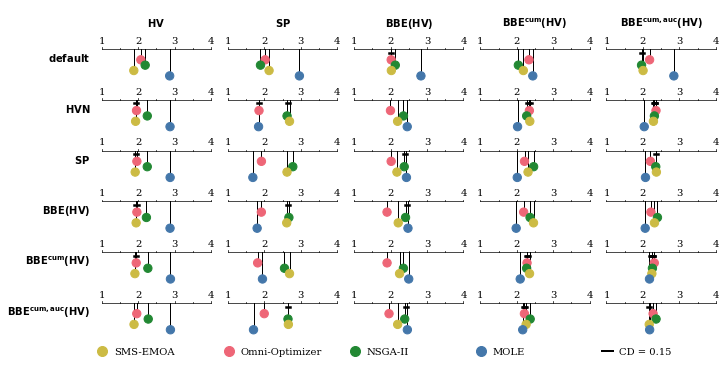

In [719]:
nrows = len(tdf["config"].unique())
ncols = len(tdf["target"].unique())

fig, axs = plt.subplots(
    2+nrows, 
    1+ncols, 
    figsize=(10,5),
    constrained_layout = True,
    gridspec_kw={'width_ratios': [0.5]+ [1]*ncols, "height_ratios": [0.5] + [1]*nrows + [0.5]})
save = None
# for i, ((target, config), gdf) in enumerate(tdf.groupby(["target","config"])):
for i, (target, config) in enumerate(itertools.product(target_order,config_order)):
    gdf = tdf[(tdf["target"] == target) & (tdf["config"] == config)]
    #     print(target, config)
    ax = axs[1+(i%len(tdf["config"].unique()))][1+(i//len(tdf["config"].unique()))]
    configstr = config.replace("NORM","").replace("config-","")
    title = f"{configstr} - {target}".replace("ABSE","A.").replace("CUM","C.").replace("AUC","A.").replace("MEAN","M.").replace("HV","HV.")

    ranks = gdf.mean(axis=0)
    #display(ranks)
    names = list(ranks.keys())
    avranks = ranks.tolist()
    cd = compute_CD(avranks, len(gdf), alpha="0.1", test="nemenyi") #tested on 14 datasets 
    #print("cd=",cd)
    colored_graph_ranks(avranks, names, cd=cd, width=6, textspace=0, cdmethod=None, ax=ax,)
    if ax is None:
        plt.title(title)
        #plt.text(0.1,0,f"CD: {cd:.5f}",color="red",fontsize="large")
        if save is not None:
            plt.savefig(save,bbox_inches='tight')
        plt.show()
    else:
        ax.set_title("",y=0.8)
#         ax.set_title(title,y=0.8)
        
def replace_abse(name):
    mapper = {"NORM": "",
              "-": "",
              " ": " ",
              "config": "",
              "ABSEHVMEAN": "BBE(HV)", 
              "ABSECUMHVMEAN": "BBE^{cum}(HV)", 
              "ABSECUMHVAUCMEAN": "BBE^{cum,auc}(HV)"}
    for s,r in mapper.items():
        name = name.replace(s,r)
    return name
    
for i, col in enumerate(target_order):
    ax = axs[0][1+i]
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.5,0,"$\\bf {}$".format(replace_abse(col)), ha="center")
    ax.axis('off')
    
for i, row in enumerate(config_order):
    ax = axs[1+i][0]
    ax.text(1,0.5,"$\\bf {}$".format(replace_abse(row)), ha="right")
    ax.axis('off')
    
solvers = list(df["solver"].unique())
for i, col in enumerate(target_order):
    ax = axs[-1][1+i]
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.axis('off')
    if i < len(solvers):
        for _, style in stylemap.items():
            if style["label"] == solvers[i]:
                print(style)
                ax.text(0.15,0.45,style["label"], va="center")
                ax.scatter([0.05],[0.5], c=style["color"], s=10**2)
    elif i == len(solvers):
        ax.text(0.15,0.45,"CD = {:0.2f}".format(cd), va="center")
        ax.plot([0,.1],[0.5,0.5],linewidth=2,c="black")
        
        
    
axs[0][0].axis("off")
axs[-1][0].axis("off")



plt.savefig("figures/rankings.pdf", bbox_inches='tight', pad_inches=0)

In [720]:
list(df["solver"].unique())

['SMS-EMOA', 'Omni-Optimizer', 'NSGA-II', 'MOLE']

In [721]:
# See how the mean measures are 
#compute the rankings for each scenario (config, seed, target)
tdf = mdf.unstack("solver").dropna().reset_index(drop=True) 
tdf = tdf.stack([0, 1])

meanscores = gdf.mean().to_frame().unstack(1).T[config_order]
meanscores = mdf.groupby("solver").mean().max(axis=0).to_frame().unstack(0)
display(meanscores)
print(meanscores.to_latex(float_format="${:0.3e}$".format, na_rep="")
      .replace("\$","$")
      .replace("NORM","")
      .replace("config-","")
      .replace("e+0","^")
     .replace("ABSE",""))

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_9870/2059146107.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meanscores = gdf.mean().to_frame().unstack(1).T[config_order]


KeyError: "['default' 'config-HVN' 'config-SP' 'config-ABSEHVMEANNORM'\n 'config-ABSECUMHVMEANNORM' 'config-ABSECUMHVAUCMEANNORM'] not in index"

In [722]:
mdf.groupby("solver").mean().max(axis=0).to_frame().unstack(0)

0                              \
config                 default    config-HVN     config-SP   
ABSECUMHVAUCMEAN  4.116083e+09  4.498796e+09  4.529641e+09   
ABSECUMHVMEAN     1.702079e+05  1.832354e+05  1.832310e+05   
ABSEHVMEAN        1.329269e+05  1.391710e+05  1.205009e+05   
HV                1.863840e+05  1.871911e+05  1.871842e+05   
SP                2.202196e+00  4.899757e+00  5.636795e+00   

                                                                 \
config           config-ABSEHVMEANNORM config-ABSECUMHVMEANNORM   
ABSECUMHVAUCMEAN          4.213755e+09             4.402226e+09   
ABSECUMHVMEAN             1.830565e+05             1.832060e+05   
ABSEHVMEAN                1.616116e+05             1.697547e+05   
HV                        1.868537e+05             1.868487e+05   
SP                        4.181282e+00             4.170840e+00   

                                              
config           config-ABSECUMHVAUCMEANNORM  
ABSECUMHVAUCMEAN                4.501584e+09  
ABSECUMHVMEAN                   1.832365e+05  
ABSEHVMEAN                      1.510096e+05  
HV                              1.868928e+05  
SP                              3.504926e+00

In [723]:
mmdf = df.groupby(["config","solver","instance","seed"])[list(targets.keys())].mean().unstack("config")
mmdf = mmdf.swaplevel(axis='columns').sort_index(1)
for rn, grp in mmdf[pd.isnull(mmdf["config-HVN"]).any(axis=1)].groupby(level=[0,1]):
    print(" - ".join(rn), "- runs: ", len(grp))
    #display(grp.head(1))

mmdf = mmdf.dropna() #Remove solver-instance-seed lines where no results are for yet
#IMPUTE
mmdf = mmdf.stack("config").reset_index()

# for col in targets.keys():
#     print(col)
#     minimumHV = mmdf[mmdf[col] > 0].groupby("instance")[col].min().to_dict()
#     #display(dict(sorted(minimumHV.items(), key=lambda x: x[1])))
#     def adjustHV(row):
#         if row[col] == 0:
#             print(".",end="")
#             return minimumHV[row["instance"]]*0.5 #IMPUTE in PAR2 style
#             #return np.nan #DELETE
#         else:
#             return row[col]    
#     mmdf[col] = mmdf.apply(adjustHV,1)
#     print("")
    
mmdf = mmdf.set_index(["solver","instance","seed","config"]).unstack("config")
mmdf = mmdf.swaplevel(axis='columns').sort_index(1)

# See how the mean measures are 
#compute the rankings for each scenario (config, seed, target)
tdf = mmdf.unstack("solver").dropna().reset_index(drop=True) 
tdf = tdf.stack([0, 1])

meanscores = mmdf.mean().to_frame().unstack(1).T[config_order]
meanscores = mmdf.groupby("solver").mean().max(axis=0).to_frame().unstack(0)
display(meanscores)
print(meanscores.to_latex(float_format="${:0.3f}$".format, na_rep="")
      .replace("\$","$")
      .replace("NORM","")
      .replace("config-","")
      .replace("e+0","^")
     .replace("ABSE","").replace("HVN","HV"))

MOLE - DTLZ4 - runs:  25
MOLE - ZDT6 - runs:  22
SMS-EMOA - MMF8 - runs:  25


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_9870/51741052.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  mmdf = mmdf.swaplevel(axis='columns').sort_index(1)
/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_9870/51741052.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  mmdf = mmdf.swaplevel(axis='columns').sort_index(1)


0                              \
config                     default    config-HVN     config-SP   
ABSECUMHVAUCMEANNORM  15112.063625  16116.884721  16100.813001   
ABSECUMHVMEANNORM         0.616884      0.651827      0.651620   
ABSEHVMEANNORM            0.419764      0.524399      0.507254   
HVN                       1.031363      1.070425      1.070245   
SP                        2.202196      4.899757      5.636795   

                                                                     \
config               config-ABSEHVMEANNORM config-ABSECUMHVMEANNORM   
ABSECUMHVAUCMEANNORM          15966.953922             15992.667292   
ABSECUMHVMEANNORM                 0.650201                 0.651736   
ABSEHVMEANNORM                    0.539978                 0.556475   
HVN                               1.059948                 1.068483   
SP                                4.181282                 4.170840   

                                                  
config               config-ABSECUMHVAUCMEANNORM  
ABSECUMHVAUCMEANNORM                16107.108491  
ABSECUMHVMEANNORM                       0.651883  
ABSEHVMEANNORM                          0.536945  
HVN                                     1.062218  
SP                                      3.504926

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{6}{l}{0} \\
config &     default &  HV &   SP & HVMEAN & CUMHVMEAN & CUMHVAUCMEAN \\
\midrule
CUMHVAUCMEAN & $15112.064$ & $16116.885$ & $16100.813$ &           $15966.954$ &              $15992.667$ &                 $16107.108$ \\
CUMHVMEAN    &     $0.617$ &     $0.652$ &     $0.652$ &               $0.650$ &                  $0.652$ &                     $0.652$ \\
HVMEAN       &     $0.420$ &     $0.524$ &     $0.507$ &               $0.540$ &                  $0.556$ &                     $0.537$ \\
HV                  &     $1.031$ &     $1.070$ &     $1.070$ &               $1.060$ &                  $1.068$ &                     $1.062$ \\
SP                   &     $2.202$ &     $4.900$ &     $5.637$ &               $4.181$ &                  $4.171$ &                     $3.505$ \\
\bottomrule
\end{tabular}



# Configuration analysis

In [724]:
fdf = pd.read_csv(f"results.csv") #results of configuring on complete problem set
fdf["benchmark"] = fdf["instance"].apply(getBenchmarkSet)
fdf = fdf.drop(columns="Unnamed: 0")
fdf["config"] = fdf["solver"].apply(lambda x: "config-"+x.split("_")[-1])
fdf["solver"] = fdf["solver"].apply(lambda x: "_".join(x.split("_")[:-1]))
fdf.loc[fdf["configuration"].isna(),"config"] = "default"

if "DN-NSGAII" in fdf["solver"].unique():
    fdf = fdf[fdf['solver'] != "DN-NSGAII"]

fdf.groupby(["seed","solver","instance","config"]).count().sort_values("HV",ascending=False)
fdf.head(2)

,run,seed,HV,HVN,SP,ABSEHVMEAN,ABSEHVMEANNORM,ABSEHVAUCMEAN,ABSEHVAUCMEANNORM,ABSEHVAUCB1,ABSECUMHVMEAN,ABSECUMHVMEANNORM,ABSECUMHVAUCMEAN,ABSECUMHVAUCMEANNORM,ABSECUMHVAUCB1,solver,instance,configuration,benchmark,config
0,0.0,2733.0,33.590678,0.997794,1.838822,19.772189,0.587323,483707.186267,14368.282098,828024.500716,26.190268,0.777969,636405.180145,18904.100283,833673.630528,SMS-EMOA,MMF3,NaN,MMF,default
1,1.0,43568.0,33.625570,0.998831,1.664297,18.640779,0.553715,405243.645927,12037.561542,827711.574431,19.789131,0.587826,459901.170223,13661.136197,832538.870903,SMS-EMOA,MMF3,NaN,MMF,default


In [ ]:
def pairwise(lst):
    lst = iter(lst)
    return zip(lst, lst)

def try_float(string):
    if re.match(r'^-?\d+$', string):
        string = int(string)
        if string > 10**5:
            return "${:.2e}$".format(string)
        return ("${:,d}$".format(int(string))).replace(",","\,")
    if re.match(r'^-?\d+(?:\.\d+)$', string):
        string = float(string)
        if string <= 0.001 or string >= 10000:
            return "${:.2e}$".format(string)
        else:
            return "${:.2f}$".format(string)
    return string

In [ ]:
def build_param_string(params):
    if params is None:
        return params

    paramstring = []
    for param, value in pairwise(params.split(" ")):
        paramstring.append(f"-{param} {value}")
    return " ".join(paramstring)

confstring = fdf.groupby(["solver","config"]).first()["configuration"].apply(build_param_string)

instances = ["MMF4"]

latexstring = ""


# \begin{figure}[H]
# \centering
#      \begin{subfigure}[b]{0.3\textwidth}
#          \centering
#          \includegraphics[width=\textwidth,trim={0 0 13cm 0}, clip]{figures/moplots/MOEAD_defaultMMF4-dec.jpg}
#          \caption{default}
#      \end{subfigure}
#      \hfill
#      \begin{subfigure}[b]{0.3\textwidth}
#          \centering
#          \includegraphics[width=\textwidth,trim={0 0 13cm 0}, clip]{figures/moplots/MOEAD_config-HVNMMF4-dec.jpg}
#          \caption{config-HV}
#      \end{subfigure}
#      \hfill
#      \begin{subfigure}[b]{0.3\textwidth}
#          \centering
#          \includegraphics[width=\textwidth,trim={0 0 13cm 0}, clip]{figures/moplots/MOEAD_config-SPDMMF4-dec.jpg}
#          \caption{config-SP}
#      \end{subfigure}
#         \caption{MOEA/D}
# \end{figure}
# \end{document}

confstring["MOEAD"]["config-SPD"]
for instance in instances:
    for solver in ["MOLE","SMS-EMOA"]:
        latexstring += "\\begin{figure}[H]\n\\centering\n"
        figuremaking = ""
        
        figurelist = []
        figurelabel = []
        print(f"cd ../../resources/algorithms/{solver}")
        for config in ["default","config-HVN","config-SPD"]:
        #for config,string in confstring[solver].iteritems():
            string = confstring[solver][config]
            if config == "config-HV": continue
                
            latexstring += "\\begin{subfigure}[b]{0.3\\textwidth}\n\\centering\n\\includegraphics[width=\\textwidth,trim={0 0 13cm 0}, clip]{figures/moplots/"
            latexstring += f"{solver}_{config}{instance}-dec.jpg"
            latexstring += "}\n\caption{" + config + "}\n\\end{subfigure}\n"
            
            
            string = string if string is not None else ""
            print(f"./algorithm.r --instance ../../instances/{instance} --visualise \"${{destfolder}}/{solver}_{config}_{instance}.pdf\" --budget 20000 {string}")

            figurelist.append(f"results/{solver}_{config}_{instance}.pdf.Rdata")
            figurelabel.append(config)
            figuremaking += f"./make_landscapes.R --filelist results/{solver}_{config}_{instance}.pdf.Rdata --instance {instance} --dest figures2/{solver}_{config}\n"

            
        figurelist = ",".join(figurelist)
        figurelabel = ",".join(figurelabel)
        figuremaking += f"./make_landscapes.R --filelist {figurelist} --name {figurelabel} --instance {instance} --dest figures2/{solver}_stacked\n"
        latexstring += "\\caption{" + solver + "}\n\\end{figure}\n\n"
        print("cd $CWD")
        print(figuremaking)
print(latexstring)

In [ ]:
df[(df["solver"] == "Omni-Optimizer") & (df["instance"] == "MMF4") & (df["config"] == "config-SPD")].sort_values("SPD")


In [ ]:
for solver, gdf in fdf.groupby("solver"):
    print(solver)
    gdf = gdf.groupby("config").first()
    #display(gdf[["configuration"]].to_dict())
    cdf = []
    for name,c in gdf.iterrows():
        config = dict()
        if c["configuration"] is not None:
            config = dict(pairwise(c["configuration"].split()))
            config = {k[1:]: try_float(v[1:-1]) for k,v in config.items()}
        cdf.append({"config":name, **config})
        
    cdf = pd.DataFrame(cdf).set_index("config")
    display(cdf.transpose())
    
    for param,_ in cdf.loc["default"].iteritems():
#         print(param)
#         try:
#             print(solver_defaults[solver][param])
        cdf.loc["default",param] = try_float(solver_defaults[solver][param]["default"])
        cdf.loc["range",param] = solver_defaults[solver][param]["range"]
#         except:
#             pass
        
    cdf = cdf.transpose()
    cdf = cdf[["default"] + [c for c in cdf.columns if c != "default"]]
    cdf["range"] = cdf["range"].replace(","," , ").replace("  "," ")
    
#     display(cdf)

In [ ]:
def pairwise(lst):
    lst = iter(lst)
    return zip(lst, lst)

def try_float(string):
    if re.match(r'^-?\d+$', string):
        string = int(string)
        if string > 10**5:
            return "${:.2e}$".format(string)
        return ("${:,d}$".format(int(string))).replace(",","\,")
    if re.match(r'^-?\d+(?:\.\d+)$', string):
        string = float(string)
        if string <= 0.001 or string >= 10000:
            return "${:.2e}$".format(string)
        else:
            return "${:.2f}$".format(string)
    return string

In [ ]:

#tdf = df.groupby(["solver","instance","config"])["configuration"].first().to_frame().unstack("config")
# print("\\begin{table} \n \\footnotesize \n \\centering ")
# print("\\caption{Configurations \jeroen{raw export}} \n")

for solver, gdf in fdf.groupby("solver"):
    #print(solver)
    gdf = gdf.groupby("config").first()
    cdf = []
    for name,c in gdf.iterrows():
        config = dict()
        if c["configuration"] is not None:
            config = dict(pairwise(c["configuration"].split()))
            config = {k[1:]: try_float(v[1:-1]) for k,v in config.items()}
        cdf.append({"config":name, **config})
        
    cdf = pd.DataFrame(cdf).set_index("config")
    
    for param,_ in cdf.loc["default"].iteritems():
#         print(param)
#         try:
#             print(solver_defaults[solver][param])
        cdf.loc["default",param] = try_float(solver_defaults[solver][param]["default"])
        cdf.loc["range",param] = solver_defaults[solver][param]["range"]
#         except:
#             pass
        
    cdf = cdf.transpose()
    cdf = cdf[["default"] + [c for c in cdf.columns if c != "default"]]
    cdf["range"] = cdf["range"].replace(","," , ").replace("  "," ")
    
    #cdf = cdf.apply(pd.to_numeric, errors='ignore')
    latex = cdf.to_latex(float_format="${:0.2e}$".format, 
                    na_rep="")
    
    latex = re.sub(r'e([-+]?\d+)', r'\\mathrm{e}{\g<1>}', latex)
    latex = latex.replace("{{e}{-0","{e}{-")
    latex = latex.replace("{{e}{+0","{e}{")
    latex = latex.replace("\$","$")
    latex = latex.replace("\\textbackslash ,","\,")
    latex = latex.replace("lllll","lrrrp{2.5cm}")
    
    print("\\begin{table} \n \\small \n \\centering ")
    print("\\caption{Configurations for "+solver+" \jeroen{raw export}}")
    
    print(latex)

    print("\\end{table}")
    

In [ ]:
#tdf = df.groupby(["solver","instance","config"])["configuration"].first().to_frame().unstack("config")
print("\\begin{table*} \n \\footnotesize \n \\centering ")
print("\\caption{Configurations \jeroen{raw export}} \n \\begin{tabular}{lrrrrrrrrrrrrrrrrrrr}")
for solver, gdf in fdf.groupby("solver"):
    #print(solver)
    gdf = gdf.groupby("config").first()
    cdf = []
    for name,c in gdf.iterrows():
        config = dict()
        if c["configuration"] is not None:
            config = dict(pairwise(c["configuration"].split()))
            config = {k[1:]: try_float(v[1:-1]) for k,v in config.items()}
        cdf.append({"config":name, **config})
        
    cdf = pd.DataFrame(cdf).set_index("config")
    
    for param,_ in cdf.loc["default"].iteritems():
#         print(param)
        try:
#             print(solver_defaults[solver][param])
            cdf.loc["default",param] = try_float(solver_defaults[solver][param])
        except:
            pass
        
    cdf = cdf.transpose()
    cdf = cdf[["default"] + [c for c in cdf.columns if c != "default"]]
    cdf = cdf.transpose()
    
    
    cdf = cdf.replace("mutPolynomial","poly")
    cdf = cdf.replace("mutGauss","gauss")
    cdf = cdf.replace("mutUniform","uni")
    cdf = cdf.replace("recIntermediate","Int")
    
    cdf = cdf.replace("uniform","uni")
    
    cdf = cdf.replace("mut","")
    cdf = cdf.replace("rec","")
    cdf = cdf.replace("none","")
    
    
    
    if "varop4" in cdf.columns:
        cdf = cdf.drop(columns="varop4")
    
    colsizes = {col: max(cdf[col].apply(lambda x: len(str(x)))) for col in cdf.columns}
    colsizes = dict(sorted(colsizes.items(), key=lambda x: x[1])[::-1])
    cdf = cdf[colsizes.keys()]
    cdf.columns = [c[-4:] for c in cdf.columns]
    
    #cdf = cdf.apply(pd.to_numeric, errors='ignore')
    latex = cdf.to_latex(float_format="${:0.2f}$".format, 
                         na_rep="",
                        index_names=False)
    latex = latex.replace("\$","$")
    latex = latex.replace("\\textbackslash ,","\,")
    latex = latex.replace("_"," ")
    latex = latex.replace("{}","\\bf{{{}}}".format(solver))
    latex = re.sub(r'e([-+]?\d+)', r'\\mathrm{e}{\g<1>}', latex)
    latex = latex.replace("{{e}{-0","{e}{-")
    latex = latex.replace("{{e}{+0","{e}{")
    
    print("\n".join(latex.split("\n")[2:-2]))
    
print("\\end{tabular}\\end{table*}")

In [ ]:
#tdf = df.groupby(["solver","instance","config"])["configuration"].first().to_frame().unstack("config")
print("\\begin{table} \n \\footnotesize \n \\centering ")
print("\\caption{Configurations \jeroen{raw export}} \n \\begin{tabular}{lrrr|rr}")
for solver, gdf in fdf.groupby("solver"):
    print("\multicolumn{{5}}{{c}}{{{}}}\\\\".format(solver))
    gdf = gdf.groupby("config").first()
    cdf = []
    for name,c in gdf.iterrows():
        config = dict()
        if c["configuration"] is not None:
            config = dict(pairwise(c["configuration"].split()))
            config = {k[1:]: try_float(v[1:-1]) for k,v in config.items()}
        cdf.append({"config":name, **config})
        
    cdf = pd.DataFrame(cdf).set_index("config")
    
    for param,_ in cdf.loc["default"].iteritems():
#         print(param)
        try:
#             print(solver_defaults[solver][param])
            cdf.loc["default",param] = try_float(solver_defaults[solver][param])
        except:
            pass
        
    cdf = cdf.transpose()
    cdf = cdf[["default"] + [c for c in cdf.columns if c != "default"]]
    
    cdf = cdf.apply(pd.to_numeric, errors='ignore')
    latex = cdf.to_latex(float_format="${:0.2f}$".format, 
                         na_rep="",
                        index_names=False)
    latex = latex.replace("\$","$")
    latex = latex.replace("\\textbackslash ,","\,")
    latex = latex.replace("_"," ")
    latex = latex.replace("{}","\\bf{{{}}}".format(solver))
    print("\n".join(latex.split("\n")[2:-2]))
    
print("\\end{tabular}\\end{table}")

In [ ]:
"lllllllllllllllllllll".replace("l","r")

In [ ]:
#get pcs files
solver_defaults = {}

solverspath = "../../resources/algorithms/"
for solver in os.listdir(solverspath):
    if not os.path.isdir(solverspath+solver) or solver[0] == "_":
        continue
        
    pcsfile = [f for f in os.listdir(solverspath+solver) if f[-4:] == ".pcs"]
    
    if len(pcsfile) != 1:
        continue
        
    pcs = open(solverspath+solver+"/"+pcsfile[0],"r").read()
    defaults = {}
    for line in pcs.split("\n"):
        line = line.strip()
        if len(line) < 3:
            continue
        if line[0] in ["#", "{"]:
            continue
        if line[-1] == "}":
            continue
            
        items = line.split(" ")
        
        if len(items) < 3:
            print(line)
            continue
        
        param = items[0]
        default = ""
        rng = ""
        takereange = False
        for i in items[::-1]:
            if len(i) < 3:
                continue
            if takereange:
                rng = i+" "+rng
                if i[0] in ["[","{"]:
                    break
            if i[0] == "[" and i[-1] == "]" and not takereange:
                default = i[1:-1]
                takereange = True
        defaults[param] = {"default":default, "range":rng}
#     print(solver)    
#     print(defaults)

    solver_defaults[solver] = defaults

solver_defaults

In [ ]:
#Check why relative changes that are always 0
tdf = mdf.stack("config").reset_index()
tdf = tdf[(tdf["config"].isin(["default","config-ABSECUMHVAUCMEANNORM"])) & (tdf["solver"] == "NSGA-II")]
#tdf = tdf.groupby(["instance","config"]).median().unstack("config")   
tdf =  tdf.set_index(["config","instance","solver","seed"]).unstack("config")
tdf = tdf["HV"]
tdf["change"] = (tdf["config-ABSECUMHVAUCMEANNORM"] - tdf["default"]) / tdf["default"]

tdf

# Scatter plots

**NOT USED HERE**

In [ ]:
def scatter_plot(data, label=False, group=None,title=None, ax=None, save=None):
    markers = ['o', 'v', 's', '^', 'h', 'H', 'D', 'd', 'P', 'X']
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))
        
    ax.set_title(title)
    
    if label == True:
        for name,line in data.iterrows():
            ax.text(line["SPD"], line["HV"], name, rotation=25)
    
    if group is None:
        ax.scatter(data["SPD"], data["HV"])
    else:
        for i,(label, points) in enumerate(data.groupby(group)):
            ax.scatter(points["SPD"], points["HV"], label=label, marker = markers[i%len(markers)], alpha=0.8)
        ax.legend()
            
        
    ax.set_xlabel("SP")
    ax.set_ylabel("HV")
    #ax.set_yscale("symlog")
    #ax.set_xscale("symlog")
    #plt.hlines(range(-120,120,10),*ax.get_xlim(),color=(.8,.8,.8),zorder=-10)
    #plt.vlines(range(20,20,10),*ax.get_ylim(),color=(.8,.8,.8),zorder=-10)
    ax.grid()
    rng = max(10,np.max(np.abs(ax.get_xlim())))
    ax.set_xlim(-rng,rng)
    rng = max(10,np.max(np.abs(ax.get_ylim())))
    ax.set_ylim(-rng,rng)
    square = matplotlib.patches.Rectangle((0,0), 
                                          ax.get_xlim()[1], 
                                          ax.get_ylim()[1], 
                                          facecolor=(0.8,1,0.8),
                                          zorder=-10)
    ax.add_patch(square)
    square = matplotlib.patches.Rectangle((0,0), 
                                          ax.get_xlim()[0], 
                                          ax.get_ylim()[0], 
                                          facecolor=(1,0.8,0.8),
                                          zorder=-10)
    ax.add_patch(square)
    
#     ax.text(ax.get_xlim()[1]/2,
#             ax.get_ylim()[0]/2,
#             "better SP\nworse HV",
#             ha="center", 
#             va="center")
    
    if ax is None:
        plt.show()

In [ ]:
#Take median of all runs
rddf = mdf.groupby(["solver","instance"]).median()
#Compute the relative changes for configuration
tdf = (100*(rddf["config-HVN"] - rddf["config-SP"] ) / rddf["config-SP"]).reset_index()
tdf["fromto"] = ["SP-HV"]*len(tdf)
tdf2 = (100*(rddf["config-SP"] - rddf["config-HVN"] ) / rddf["config-HVN"]).reset_index()
tdf2["fromto"] = ["HVN-SP"]*len(tdf2)
tdf3 = (100*(rddf["config-HVN"] - rddf["config-SP"] ) / rddf["config-SP"]).reset_index()
tdf3["fromto"] = ["SP-HVN"]*len(tdf3)

tdf = pd.concat([tdf,tdf2,tdf3],ignore_index=True)
tdf = tdf.set_index(["solver","instance","fromto"]).unstack("fromto")
tdf = tdf.swaplevel(axis='columns').sort_index(1)
tdf.columns = ["_".join(c) for c in tdf.columns] #Flatten
tdf["benchmark"] = [getBenchmarkSet(i) for i in tdf.index.get_level_values(level=1)]
tdf

In [ ]:
def scatter_plot(data, label=False, group=None,title=None, ax=None, save=None):
    markers = ['o', 'v', 's', '^', '+', 'D', 'X', 'P', 'X']
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))
        
    ax.set_title(title)
    
    if label == True:
        for name,line in data.iterrows():
            ax.text(line["SPD"], line["HV"], name, rotation=25)
    
#     if group is None:
#         ax.scatter(data["SP-HV"]["SPD"], data["HV-SP"]["HV"])
#     else:
#         for i,(label, points) in enumerate(data.groupby(group)):
#             ax.scatter(points["SP-HV"]["SPD"], 
#                        points["HV-SP"]["HV"], 
#                        label=label, 
#                        marker = markers[i%len(markers)],
#                        alpha=0.6)
#         ax.legend()
    sns.scatterplot(data=data, 
                y="HVN-SP_SP",
                x="SP-HVN_HV",
                s=72,
                hue="solver",
                style="benchmark",
                alpha=0.7,
                ax=ax)
            
        
    ax.set_ylabel("SP")
    ax.set_xlabel("HV")
    ax.set_xlim(-100,100)

    #ax.set_yscale("symlog")
    #ax.set_xscale("symlog")
    #plt.hlines(range(-120,120,10),*ax.get_xlim(),color=(.8,.8,.8),zorder=-10)
    #plt.vlines(range(20,20,10),*ax.get_ylim(),color=(.8,.8,.8),zorder=-10)
    ax.grid()
    rng = min(100,max(10,np.max(np.abs(ax.get_xlim()))))
    ax.set_xlim(-rng,rng)
    rng = min(100,max(10,np.max(np.abs(ax.get_ylim()))))
    ax.set_ylim(-rng,rng)
    
        
    ax.set_ylim(-50,100)
    ax.set_xlim(-50,130)
    
    square = matplotlib.patches.Rectangle((0,0), 
                                          ax.get_xlim()[1], 
                                          ax.get_ylim()[1], 
                                          facecolor=(1,0.85,0.85),
                                          zorder=-10)
    ax.add_patch(square)
    square = matplotlib.patches.Rectangle((0,0), 
                                          ax.get_xlim()[0], 
                                          ax.get_ylim()[0], 
                                          facecolor=(0.85,1,0.85),
                                          zorder=-10)
    ax.add_patch(square)
    
#     ax.text(ax.get_xlim()[1]/2,
#             ax.get_ylim()[0]/2,
#             "better SP\nworse HV",
#             ha="center", 
#             va="center")
    
    if ax is None:
        plt.show()
        return (fig,ax)
    
    return (None,None)

tdf


fig, ax = plt.subplots(figsize=(5,5))
scatter_plot(tdf, group="benchmark", ax=ax)
print(ax.get_legend_handles_labels()[1])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
# ax.set_xlim(-5,5)
# # ax.set_ylim(-5,5)
# ax.set_ylim(-50,100)
# ax.set_xlim(-50,130)
ax.set_ylabel("SP relative loss [%]")
ax.set_xlabel("HV relative loss [%]")
ax.set_aspect('equal', adjustable='box')

legend = ax.get_legend_handles_labels()
handles = []
labels = []
for handle, label in zip(*legend):
    label = label if label != "solver" else "algorithm"
    label = f"$\\bf {label.capitalize()}$" if label in ["algorithm","benchmark"] else label
    labels.append(label)
    
# handles = [""] + handles
# labels = ["$\bf Indicator$"] + labels
ax.legend(handles=legend[0], labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.tight_layout()
plt.savefig("figures/scatter_relativeloss.pdf",dpi=150,bbox_inches='tight')
plt.show()

print(len(tdf))
print("No   loss", np.count_nonzero((tdf["HVN-SP_SP"] <= 0) & (tdf["SP-HVN_HV"] <= 0)))
print("One  loss", np.count_nonzero((tdf["HVN-SP_SP"] <= 0) & (tdf["SP-HVN_HV"] > 0)))
print("One  loss", np.count_nonzero((tdf["HVN-SP_SP"] > 0) & (tdf["SP-HVN_HV"] <= 0)))
print("Both loss", np.count_nonzero((tdf["HVN-SP_SP"] > 0) & (tdf["SP-HVN_HV"] > 0)))

#scatter_plot(tdf, group="solver")

In [ ]:
benchmarksizes = (tdf.groupby("benchmark").count()/7)["HVN-SP_HV"].to_dict()

In [ ]:
print("No loss")
ttdf = tdf[(tdf["HVN-SP_SPD"] <= 0) & (tdf["SP-HVN_HV"] <= 0)].groupby(["solver","benchmark"])["HVN-SP_HV"].count().unstack("benchmark",fill_value=0)

display(ttdf.sum(axis=1) / ttdf.to_numpy().sum())

for col in ttdf.columns:
    ttdf[col] = ttdf[col] / benchmarksizes[col]


display((ttdf.sum(axis=0) / ttdf.to_numpy().sum())-0.25)
ttdf

In [ ]:
print("1 loss")
oneloss = ((tdf["HVN-SP_SPD"] <= 0) & (tdf["SP-HVN_HV"] > 0)) | ((tdf["HVN-SP_SPD"] > 0) & (tdf["SP-HVN_HV"] <= 0))

ttdf = tdf[oneloss].groupby(["solver","benchmark"])["HVN-SP_HV"].count().unstack("benchmark",fill_value=0)

display(ttdf.sum(axis=1) / ttdf.to_numpy().sum())

for col in ttdf.columns:
    ttdf[col] = ttdf[col] / benchmarksizes[col]

display((ttdf.sum(axis=0) / ttdf.to_numpy().sum())-0.25)

ttdf

In [ ]:
print("Loss")
ttdf = tdf[(tdf["HVN-SP_SPD"] > 0) & (tdf["SP-HVN_HV"] > 0)].groupby(["solver","benchmark"])["HVN-SP_HV"].count().unstack("benchmark",fill_value=0)


display(ttdf.sum(axis=1) / ttdf.to_numpy().sum())

for col in ttdf.columns:
    ttdf[col] = ttdf[col] / benchmarksizes[col]

display((ttdf.sum(axis=0) / ttdf.to_numpy().sum())-0.25)
    
ttdf['mean'] = ttdf.mean(axis=1)
ttdf.loc["mean"] = ttdf.mean(axis=0)
display(ttdf)

In [ ]:
# benchmarksizes = (tdf.groupby("benchmark").count()/7)["HV-SP_HV"].to_dict()

In [ ]:
df["SPD"].plot(kind="box")

This figure shows the procentual difference on the indicator when configuring for the other. 
- Points in the green area show that configuring on the other indicator yields better performance on the other indicator as well in both cases. 
- Points in the red area show that the other indicator performance decreases when configuring for the other indicator in both cases. These points make the argument that there is a trade-off between SP and HV.

## Graveyard

In [ ]:
tdf = df[(df["config"].isin(["default","config-ABSECUMHVAUCMEANNORM"])) & (df["solver"] == "NSGA-II")]
tdf = tdf.groupby(["config","solver","instance","seed"])[list(targets.values())].mean().unstack("config")
#tdf = tdf.swaplevel(axis='columns').sort_index(1)
# for rn,grp in mdf[pd.isnull(mdf["config-HVN"]).any(axis=1)].groupby(level=[0,1]):
#     print(" - ".join(rn), "- runs: ", len(grp))
#     #display(grp.head(1))

# mdf = mdf.dropna() #Remove solver-instance-seed lines where no results are for yet

# mdf.head(2)
tdf["HV"]

In [ ]:
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
# for fig in xrange(1, figure().number): ## will open an empty extra figure :(
#     pdf.savefig( fig )
#pdf.close()

# for instance, gdf in rddf.groupby("instance"):
#     print(instance)
#     display(gdf)
#     break
for target in ["HV","SPD"]:
    pdf = matplotlib.backends.backend_pdf.PdfPages(f"variance_{target}.pdf")
    figs = []
    for j, (instance, gdf) in enumerate(rddf.groupby("instance")):
        figs.append(plt.subplots(1,3,figsize=(15,4)))
        fig, ax = figs[j]
        #gdf = gdf.swaplevel(axis='columns').sort_index(axis=1).reset_index().set_index(["solver"])
        gdf = gdf.stack("config").reset_index().set_index("solver")
        #gdf.groupby(["solver","config"])["HV"].plot(kind="bar")
        for i, (conf, ggdf) in enumerate(gdf.groupby("config")):
            ggdf.boxplot(column=[target], by='solver', ax=ax[i])
            ax[i].set_title(conf)
            ax[i].tick_params(axis='x', labelrotation=15)
            ax[i].set_ylim(gdf[target].min()/1.5,gdf[target].max()*1.1)
            if i > 0:
                ax[i].axes.yaxis.set_ticklabels([])
        #sns.boxplot(x="solver",y="HV",data=gdf)
        fig.suptitle(instance,fontweight="bold")
        fig.tight_layout()
        #fig.show()
        pdf.savefig( fig )

    pdf.close()
del figs
plt.clf()

In [ ]:
tdf = (100*(mdf["config-HV"] - mdf["default"] ) / mdf["default"]).reset_index().replace(np.inf, 1000)

fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(x="SPD",y="HV",data=tdf.groupby("instance").mean())
plt.ylim(-50,100)
plt.xlim(-1,100)
plt.hlines(range(-100,120,20),*ax.get_xlim(),color=(.8,.8,.8),zorder=-10)

In [ ]:
mdf["config-SPD"] - mdf["default"]

In [ ]:
for (solver,config),gdf in df.groupby(["solver", "config"]):
    if solver == "higamo":
        print(solver, config)
        config =  gdf["configuration"].iloc[0]
        try:
            print(config.replace(" -","\n-"))
        except:
            print(config)
            pass


In [ ]:
# tdf = 100*((rddf["config-HV"] - rddf["default"] ) / rddf["default"])
# display(tdf)
# data = tdf.groupby("solver").median()
# scatter_plot(data,
#             label=True)
# plt.show()

# data = tdf.groupby("instance").median()
# scatter_plot(data,
#             label=True)

In [ ]:


# fix,axs = plt.subplots(2,2,figsize=(12,12))
# #tdf = tdf.groupby("seed").median()
# data = tdf.groupby("solver").mean()
# scatter_plot(data,
#             title="Mean relative change per solver after configuration on HV",
#             label=True,
#             ax = axs[0,0])

# data = tdf.groupby("solver").median()
# scatter_plot(data,
#             title="Median relative change per solver after configuration on HV",
#             label=True,
#             ax = axs[0,1])

# tdf = (100*(rddf["config-SPD"] - rddf["default"] ) / rddf["default"]).reset_index()#.replace(np.inf, 1000)
# data = tdf.groupby("solver").mean()
# scatter_plot(data,
#             title="Mean relative change per solver after configuration on SP",
#             label=True,
#             ax = axs[1,0])

# data = tdf.groupby("solver").median()
# scatter_plot(data,
#             title="Median relative change per solver after configuration on SP",
#             label=True,
#             ax = axs[1,1])

# plt.tight_layout()
# plt.savefig("scatter_solver.pdf",dpi=300)
# plt.show()

In [ ]:
# fix,axs = plt.subplots(2,2,figsize=(12,12))
# tdf = (100*(rddf["config-HV"] - rddf["default"] ) / rddf["default"]).reset_index()#.replace(np.inf, 1000)
# data = tdf.groupby(["solver","instance"]).median().reset_index(level=1)
# data["benchmark"] = [getBenchmarkSet(x) for x in data["instance"]]
# scatter_plot(data,
#             title="Mean relative change per solver-instance after configuration on HV",
#             group="benchmark",
#             label=True,
#             ax=axs[0,0])

# scatter_plot(data,
#             title="Mean relative change per solver-instance after configuration on HV",
#             group="benchmark",
#             ax=axs[0,1])

# scatter_plot(data,
#             title="Mean relative change per solver-instance after configuration on HV",
#             group="benchmark",
#             ax=axs[0,1]

# data = data.set_index("instance")
# scatter_plot(data,
#             title="Mean relative change per solver-instance after configuration on HV",
#             group="benchmark",
#             ax=axs[1,0],
#             label=True)

# axs[1,1].set_axis_off()

# plt.tight_layout()

In [ ]:
df.reset_index()

In [ ]:
a = (-5,3)

*[max(np.abs(a))]*2

In [ ]:
-30+60*np.random.rand()